In [1]:
# Importing all necessary libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import textwrap
import math
import csv
import nltk
from collections import OrderedDict
import statistics
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import scipy.stats as stats
import plotly.figure_factory as ff
import sweetviz
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

C:\Users\mayan\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# import warnings filter

from warnings import simplefilter

# ignore all future warnings

simplefilter(action='ignore', category=FutureWarning)

In [3]:
# importing csv file
data = pd.read_csv('used_cars_data.csv')

In [4]:
data

S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0     2010              72000       CNG       Manual      First  26.6 km/kg   
1     2015              41000    Diesel       Manual      First  19.67 kmpl   
2     2011              46000    Petrol       Manual      First   18.2 kmpl   
3     2012              87000    Diesel       Manual      First  20.77 kmpl   
4     2013              40670    Diesel    Automatic     Second   15.2 kmpl   
...    ...                ...       ...          ...        ...         ...   
7248  2011              89411    Diesel       Manual      First  20.54 kmpl   
7249  2015              59000    Petrol    Automatic      First  17.21 kmpl   
7250  2012              28000    Diesel       Manual      First  23.08 kmpl   
7251  2013              52262    Petrol    Automatic      Third   17.2 kmpl   
7252  2014              72443    Diesel    Automatic      First   10.0 kmpl   

       Engine      Power  Seats  New_Price  Price  
0      998 CC  58.16 bhp    5.0        NaN   1.75  
1     1582 CC  126.2 bhp    5.0        NaN  12.50  
2     1199 CC   88.7 bhp    5.0  8.61 Lakh   4.50  
3     1248 CC  88.76 bhp    7.0        NaN   6.00  
4     1968 CC  140.8 bhp    5.0        NaN  17.74  
...       ...        ...    ...        ...    ...  
7248  1598 CC  103.6 bhp    5.0        NaN    NaN  
7249  1197 CC  103.6 bhp    5.0        NaN    NaN  
7250  1461 CC   63.1 bhp    5.0        NaN    NaN  
7251  1197 CC  103.6 bhp    5.0        NaN    NaN  
7252  2148 CC    170 bhp    5.0        NaN    NaN  

[7253 rows x 14 columns]

In [5]:
data.shape # shows number of rows and columns of data

(7253, 14)

In [6]:
number_rows = data.shape[0] # stores number of rows
number_columns = data.shape[1] # stores number of columns

In [7]:
print(data.nunique())# prints number of unique values in a column

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64


In [8]:
data.dtypes# prints data types of columns

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [9]:
data['Name'].value_counts()# Prints unique names of cars and number of times they have occured in the dataset

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

In [10]:
data['Location'].value_counts()# Prints unique names of Locations and number of times they have occured in the dataset

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

In [11]:
data['Fuel_Type'].value_counts()# Prints unique names of Fuel and number of times they have occured in the dataset

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

We are given names of different cars whose first string consists of the company name
So we extracted them and made a new column

In [12]:

comp=[]
for i in range(7253):
    if (data["Name"][i].split()[0]) not in comp:
        comp.append(data["Name"][i].split()[0])

In [13]:
print(comp)
print(len(comp))
number_company = len(comp)

['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota', 'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault', 'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun', 'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini', 'Hindustan', 'OpelCorsa']
33


In [14]:
#We will add another column of Company which stores the company of cars
comp1=[]
for i in range(7253):
    comp1.append(data["Name"][i].split()[0])

In [15]:
data['Company'] = comp1

In [16]:
data

S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0     2010              72000       CNG       Manual      First  26.6 km/kg   
1     2015              41000    Diesel       Manual      First  19.67 kmpl   
2     2011              46000    Petrol       Manual      First   18.2 kmpl   
3     2012              87000    Diesel       Manual      First  20.77 kmpl   
4     2013              40670    Diesel    Automatic     Second   15.2 kmpl   
...    ...                ...       ...          ...        ...         ...   
7248  2011              89411    Diesel       Manual      First  20.54 kmpl   
7249  2015              59000    Petrol    Automatic      First  17.21 kmpl   
7250  2012              28000    Diesel       Manual      First  23.08 kmpl   
7251  2013              52262    Petrol    Automatic      Third   17.2 kmpl   
7252  2014              72443    Diesel    Automatic      First   10.0 kmpl   

       Engine      Power  Seats  New_Price  Price        Company  
0      998 CC  58.16 bhp    5.0        NaN   1.75         Maruti  
1     1582 CC  126.2 bhp    5.0        NaN  12.50        Hyundai  
2     1199 CC   88.7 bhp    5.0  8.61 Lakh   4.50          Honda  
3     1248 CC  88.76 bhp    7.0        NaN   6.00         Maruti  
4     1968 CC  140.8 bhp    5.0        NaN  17.74           Audi  
...       ...        ...    ...        ...    ...            ...  
7248  1598 CC  103.6 bhp    5.0        NaN    NaN     Volkswagen  
7249  1197 CC  103.6 bhp    5.0        NaN    NaN     Volkswagen  
7250  1461 CC   63.1 bhp    5.0        NaN    NaN         Nissan  
7251  1197 CC  103.6 bhp    5.0        NaN    NaN     Volkswagen  
7252  2148 CC    170 bhp    5.0        NaN    NaN  Mercedes-Benz  

[7253 rows x 15 columns]

In [17]:
data.isnull().sum() #we first need to deal with NaN values

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
Company                 0
dtype: int64

In [18]:
# Remove rows with NaN values in columns Engine,Seats,Mileage
data = data[data['Engine'].notna()] 
data = data[data['Seats'].notna()]
data = data[data['Mileage'].notna()]

In [19]:
data.reset_index(inplace = True, drop = True)# Reset index

In [20]:
data

S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7193   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7194   7249                             Volkswagen Polo GT TSI      Mumbai   
7195   7250                             Nissan Micra Diesel XV     Kolkata   
7196   7251                             Volkswagen Polo GT TSI        Pune   
7197   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0     2010              72000       CNG       Manual      First  26.6 km/kg   
1     2015              41000    Diesel       Manual      First  19.67 kmpl   
2     2011              46000    Petrol       Manual      First   18.2 kmpl   
3     2012              87000    Diesel       Manual      First  20.77 kmpl   
4     2013              40670    Diesel    Automatic     Second   15.2 kmpl   
...    ...                ...       ...          ...        ...         ...   
7193  2011              89411    Diesel       Manual      First  20.54 kmpl   
7194  2015              59000    Petrol    Automatic      First  17.21 kmpl   
7195  2012              28000    Diesel       Manual      First  23.08 kmpl   
7196  2013              52262    Petrol    Automatic      Third   17.2 kmpl   
7197  2014              72443    Diesel    Automatic      First   10.0 kmpl   

       Engine      Power  Seats  New_Price  Price        Company  
0      998 CC  58.16 bhp    5.0        NaN   1.75         Maruti  
1     1582 CC  126.2 bhp    5.0        NaN  12.50        Hyundai  
2     1199 CC   88.7 bhp    5.0  8.61 Lakh   4.50          Honda  
3     1248 CC  88.76 bhp    7.0        NaN   6.00         Maruti  
4     1968 CC  140.8 bhp    5.0        NaN  17.74           Audi  
...       ...        ...    ...        ...    ...            ...  
7193  1598 CC  103.6 bhp    5.0        NaN    NaN     Volkswagen  
7194  1197 CC  103.6 bhp    5.0        NaN    NaN     Volkswagen  
7195  1461 CC   63.1 bhp    5.0        NaN    NaN         Nissan  
7196  1197 CC  103.6 bhp    5.0        NaN    NaN     Volkswagen  
7197  2148 CC    170 bhp    5.0        NaN    NaN  Mercedes-Benz  

[7198 rows x 15 columns]

In [21]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6193
Price                1223
Company                 0
dtype: int64

# Data cleaning 

1) Mileage,Engine,Power are in string data type so we will remove the unit and convert it to float

2) Mileage has data in two different units km/kg and kmpl

In [22]:
kmkg = 0
kmpl = 0
for i in data.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print('The number of rows with Km/Kg : {} '.format(kmkg))
print('The number of rows with Kmpl : {} '.format(kmpl))

The number of rows with Km/Kg : 74 
The number of rows with Kmpl : 7124 


In [23]:
# So we have 74 rows in km/kg and rest in Kmpl
# 1 liter of mileage = 710 to 775 grams ~= 742.5 grams
data1= data[data['Mileage'].notna()]
Correct_Mileage= []
for i in data1.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        #print(i)
        Correct_Mileage.append(float(i))
data1['Mileage']=Correct_Mileage        


In [24]:
data1

S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7193   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7194   7249                             Volkswagen Polo GT TSI      Mumbai   
7195   7250                             Nissan Micra Diesel XV     Kolkata   
7196   7251                             Volkswagen Polo GT TSI        Pune   
7197   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
0     2010              72000       CNG       Manual      First    37.24   
1     2015              41000    Diesel       Manual      First    19.60   
2     2011              46000    Petrol       Manual      First    18.00   
3     2012              87000    Diesel       Manual      First    20.70   
4     2013              40670    Diesel    Automatic     Second    15.00   
...    ...                ...       ...          ...        ...      ...   
7193  2011              89411    Diesel       Manual      First    20.50   
7194  2015              59000    Petrol    Automatic      First    17.20   
7195  2012              28000    Diesel       Manual      First    23.00   
7196  2013              52262    Petrol    Automatic      Third    17.00   
7197  2014              72443    Diesel    Automatic      First    10.00   

       Engine      Power  Seats  New_Price  Price        Company  
0      998 CC  58.16 bhp    5.0        NaN   1.75         Maruti  
1     1582 CC  126.2 bhp    5.0        NaN  12.50        Hyundai  
2     1199 CC   88.7 bhp    5.0  8.61 Lakh   4.50          Honda  
3     1248 CC  88.76 bhp    7.0        NaN   6.00         Maruti  
4     1968 CC  140.8 bhp    5.0        NaN  17.74           Audi  
...       ...        ...    ...        ...    ...            ...  
7193  1598 CC  103.6 bhp    5.0        NaN    NaN     Volkswagen  
7194  1197 CC  103.6 bhp    5.0        NaN    NaN     Volkswagen  
7195  1461 CC   63.1 bhp    5.0        NaN    NaN         Nissan  
7196  1197 CC  103.6 bhp    5.0        NaN    NaN     Volkswagen  
7197  2148 CC    170 bhp    5.0        NaN    NaN  Mercedes-Benz  

[7198 rows x 15 columns]

In [25]:
# Removing CC and convert it into float
engine = []
for i in range(data1.shape[0]):
    engine.append(float(data1.Engine[i][:-3]))
data1["Engine"] = engine

In [26]:
# Removing bhp and convert it into float
# In the data there are some places where there is 'null' which is also taken care of
power = []
for i in range(data1.shape[0]):
    if str(data1.Power[i]).startswith('null'):
         data1.Power[i] = np.nan
    else:
        power.append(float(data1.Power[i][:-4]))
        

        

In [27]:
data1.isnull().sum()
data1 = data1[data1['Power'].notna()]
data1["Power"] = power

In [28]:
data1.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price             object
Price                float64
Company               object
dtype: object

In [29]:
data1

S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7193   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7194   7249                             Volkswagen Polo GT TSI      Mumbai   
7195   7250                             Nissan Micra Diesel XV     Kolkata   
7196   7251                             Volkswagen Polo GT TSI        Pune   
7197   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
0     2010              72000       CNG       Manual      First    37.24   
1     2015              41000    Diesel       Manual      First    19.60   
2     2011              46000    Petrol       Manual      First    18.00   
3     2012              87000    Diesel       Manual      First    20.70   
4     2013              40670    Diesel    Automatic     Second    15.00   
...    ...                ...       ...          ...        ...      ...   
7193  2011              89411    Diesel       Manual      First    20.50   
7194  2015              59000    Petrol    Automatic      First    17.20   
7195  2012              28000    Diesel       Manual      First    23.00   
7196  2013              52262    Petrol    Automatic      Third    17.00   
7197  2014              72443    Diesel    Automatic      First    10.00   

      Engine   Power  Seats  New_Price  Price        Company  
0      998.0   58.16    5.0        NaN   1.75         Maruti  
1     1582.0  126.20    5.0        NaN  12.50        Hyundai  
2     1199.0   88.70    5.0  8.61 Lakh   4.50          Honda  
3     1248.0   88.76    7.0        NaN   6.00         Maruti  
4     1968.0  140.80    5.0        NaN  17.74           Audi  
...      ...     ...    ...        ...    ...            ...  
7193  1598.0  103.60    5.0        NaN    NaN     Volkswagen  
7194  1197.0  103.60    5.0        NaN    NaN     Volkswagen  
7195  1461.0   63.10    5.0        NaN    NaN         Nissan  
7196  1197.0  103.60    5.0        NaN    NaN     Volkswagen  
7197  2148.0  170.00    5.0        NaN    NaN  Mercedes-Benz  

[7073 rows x 15 columns]

In [30]:
# converting discrete data types into numbers
data1['Fuel_Type'] = pd.to_numeric(data1.replace({'Fuel_Type' : {'Petrol':0,'Diesel':1,'CNG':2,'LPG':3}})['Fuel_Type'])
data1['Transmission'] = pd.to_numeric(data1.replace({'Transmission' : {'Manual':0,'Automatic':1}})['Transmission'])
data1['Owner_Type'] = pd.to_numeric(data1.replace({'Owner_Type' : {'First':1,'Second':2,'Third':3,'Fourth & Above':4}})['Owner_Type'])

In [31]:
data1.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price             object
Price                float64
Company               object
dtype: object

In [32]:
# Now for Null values in Price we will split it into data_model and data_prediction
# data_model stores data which is used to create a model for prediction
# data_prediction is the data for which we need to predict the new price
data_model = data1[data1['Price'].notna()]
data_prediction = data1[data1['Price'].isnull()]
data_model.reset_index(inplace = True, drop = True)
data_prediction.reset_index(inplace = True, drop = True)


In [33]:
# cleaning the column 'New_Price' which is a string and contains values in lakhs and Cr
# So we have removed lakhs and Cr from the values and converted them to float accordingly
for i in range(data_model.shape[0]):
    if(data_model['New_Price'][i]) is not np.nan:
        if str(data_model['New_Price'][i]).endswith('Cr'):
            data_model['New_Price'][i]=(float(data_model.New_Price[i][:-3])*100)
        else:
            data_model['New_Price'][i]=(float(data_model.New_Price[i][:-5]))



In [34]:
# datam_withprice stores the data with non null values in column 'New_Price'
# datam_withoutprice stores the data with null values in column 'New_Price' and removes that null column
datam_withprice = data_model[data_model['New_Price'].notna()]
datam_withoutprice = data_model[data_model['New_Price'].isnull()]
datam_withprice = datam_withprice.dropna()
datam_withoutprice = datam_withoutprice.drop(['New_Price'], axis=1)

In [35]:
data_model

S.No.                              Name    Location  Year  \
0         0            Maruti Wagon R LXI CNG      Mumbai  2010   
1         1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2         2                      Honda Jazz V     Chennai  2011   
3         3                 Maruti Ertiga VDI     Chennai  2012   
4         4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...     ...                               ...         ...   ...   
5867   6014                  Maruti Swift VDI       Delhi  2014   
5868   6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
5869   6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
5870   6017                Maruti Wagon R VXI     Kolkata  2013   
5871   6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  Engine  \
0                 72000          2             0           1    37.24   998.0   
1                 41000          1             0           1    19.60  1582.0   
2                 46000          0             0           1    18.00  1199.0   
3                 87000          1             0           1    20.70  1248.0   
4                 40670          1             1           2    15.00  1968.0   
...                 ...        ...           ...         ...      ...     ...   
5867              27365          1             0           1    28.00  1248.0   
5868             100000          1             0           1    24.00  1120.0   
5869              55000          1             0           2    14.00  2498.0   
5870              46000          0             0           1    18.00   998.0   
5871              47000          1             0           1    25.40   936.0   

       Power  Seats New_Price  Price    Company  
0      58.16    5.0       NaN   1.75     Maruti  
1     126.20    5.0       NaN  12.50    Hyundai  
2      88.70    5.0      8.61   4.50      Honda  
3      88.76    7.0       NaN   6.00     Maruti  
4     140.80    5.0       NaN  17.74       Audi  
...      ...    ...       ...    ...        ...  
5867   74.00    5.0      7.88   4.75     Maruti  
5868   71.00    5.0       NaN   4.00    Hyundai  
5869  112.00    8.0       NaN   2.90   Mahindra  
5870   67.10    5.0       NaN   2.65     Maruti  
5871   57.60    5.0       NaN   2.50  Chevrolet  

[5872 rows x 15 columns]

In [36]:
data_model.shape

(5872, 15)

In [37]:
datam_withprice.reset_index(inplace = True, drop = True)
datam_withoutprice.reset_index(inplace = True, drop = True)

In [38]:
datam_withprice

S.No.                               Name Location  Year  \
0        2                       Honda Jazz V  Chennai  2011   
1        7  Toyota Innova Crysta 2.8 GX AT 8S   Mumbai  2016   
2       10                   Maruti Ciaz Zeta    Kochi  2018   
3       15        Mitsubishi Pajero Sport 4X4    Delhi  2014   
4       20                  BMW 3 Series 320d    Kochi  2014   
..     ...                                ...      ...   ...   
818   5999              Tata Bolt Revotron XT  Chennai  2016   
819   6002      Volkswagen Vento 1.6 Highline   Mumbai  2011   
820   6005           Maruti Vitara Brezza VDi     Pune  2016   
821   6010               Honda Brio 1.2 VX MT    Delhi  2013   
822   6014                   Maruti Swift VDI    Delhi  2014   

     Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  Engine  \
0                46000          0             0           1     18.0  1199.0   
1                36000          1             1           1     11.3  2755.0   
2                25692          0             0           1     21.5  1462.0   
3               110000          1             0           1     13.0  2477.0   
4                32982          1             1           1     22.6  1995.0   
..                 ...        ...           ...         ...      ...     ...   
818              10000          0             0           1     17.5  1193.0   
819              38000          0             0           1     16.0  1598.0   
820              37208          1             0           1     24.0  1248.0   
821              33746          0             0           1     18.0  1198.0   
822              27365          1             0           1     28.0  1248.0   

      Power  Seats New_Price  Price     Company  
0     88.70    5.0      8.61   4.50       Honda  
1    171.50    8.0      21.0  17.50      Toyota  
2    103.25    5.0     10.65   9.95      Maruti  
3    175.56    7.0     32.01  15.00  Mitsubishi  
4    190.00    5.0     47.87  18.55         BMW  
..      ...    ...       ...    ...         ...  
818   88.70    5.0      7.77   4.00        Tata  
819  103.50    5.0     11.91   3.25  Volkswagen  
820   88.50    5.0      9.93   7.43      Maruti  
821   86.80    5.0      6.63   3.20       Honda  
822   74.00    5.0      7.88   4.75      Maruti  

[823 rows x 15 columns]

In [39]:
datam_withprice

S.No.                               Name Location  Year  \
0        2                       Honda Jazz V  Chennai  2011   
1        7  Toyota Innova Crysta 2.8 GX AT 8S   Mumbai  2016   
2       10                   Maruti Ciaz Zeta    Kochi  2018   
3       15        Mitsubishi Pajero Sport 4X4    Delhi  2014   
4       20                  BMW 3 Series 320d    Kochi  2014   
..     ...                                ...      ...   ...   
818   5999              Tata Bolt Revotron XT  Chennai  2016   
819   6002      Volkswagen Vento 1.6 Highline   Mumbai  2011   
820   6005           Maruti Vitara Brezza VDi     Pune  2016   
821   6010               Honda Brio 1.2 VX MT    Delhi  2013   
822   6014                   Maruti Swift VDI    Delhi  2014   

     Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  Engine  \
0                46000          0             0           1     18.0  1199.0   
1                36000          1             1           1     11.3  2755.0   
2                25692          0             0           1     21.5  1462.0   
3               110000          1             0           1     13.0  2477.0   
4                32982          1             1           1     22.6  1995.0   
..                 ...        ...           ...         ...      ...     ...   
818              10000          0             0           1     17.5  1193.0   
819              38000          0             0           1     16.0  1598.0   
820              37208          1             0           1     24.0  1248.0   
821              33746          0             0           1     18.0  1198.0   
822              27365          1             0           1     28.0  1248.0   

      Power  Seats New_Price  Price     Company  
0     88.70    5.0      8.61   4.50       Honda  
1    171.50    8.0      21.0  17.50      Toyota  
2    103.25    5.0     10.65   9.95      Maruti  
3    175.56    7.0     32.01  15.00  Mitsubishi  
4    190.00    5.0     47.87  18.55         BMW  
..      ...    ...       ...    ...         ...  
818   88.70    5.0      7.77   4.00        Tata  
819  103.50    5.0     11.91   3.25  Volkswagen  
820   88.50    5.0      9.93   7.43      Maruti  
821   86.80    5.0      6.63   3.20       Honda  
822   74.00    5.0      7.88   4.75      Maruti  

[823 rows x 15 columns]

# Data Visualizations with Graphs

In [40]:
# average Kilometers driven
sum(data1['Kilometers_Driven'])/len((data1['Kilometers_Driven']))

58257.33323907819

In [41]:
# Max Kilometers driven
max(data1['Kilometers_Driven'])

6500000

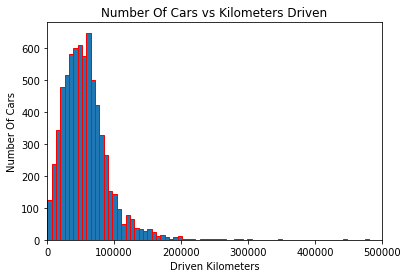

In [42]:
# Plotting the graph with Number Of Cars vs Kilometers_Driven
plt.hist(data1['Kilometers_Driven'], edgecolor='red', bins=1000)
plt.xlim([0,500000])
plt.xlabel("Driven Kilometers")
plt.ylabel("Number Of Cars")
plt.title("Number Of Cars vs Kilometers Driven")
plt.show()

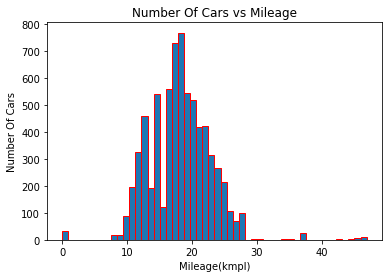

In [43]:
# Plotting the graph with Number Of Cars vs Mileage
plt.hist(data1['Mileage'],edgecolor='red', bins=50)
plt.xlabel("Mileage(kmpl)")
plt.ylabel("Number Of Cars")
plt.title("Number Of Cars vs Mileage")
plt.show()

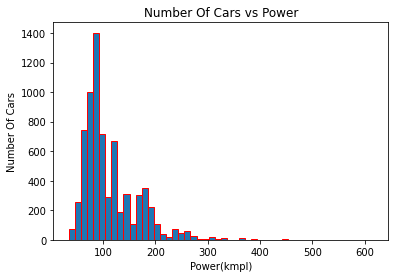

In [44]:
# Plotting the graph with Number Of Cars vs Power
plt.hist(data1['Power'],edgecolor='red', bins=50)
plt.xlabel("Power(kmpl)")
plt.ylabel("Number Of Cars")
plt.title("Number Of Cars vs Power")
plt.show()

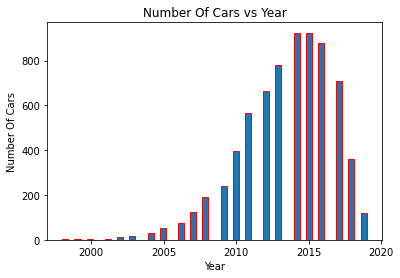

In [45]:
# Plotting the graph with Number Of Cars vs Year
plt.hist(data1['Year'],edgecolor='red', bins=50)
plt.xlabel("Year")
plt.ylabel("Number Of Cars")
plt.title("Number Of Cars vs Year")
plt.show()

In [46]:
data_model

S.No.                              Name    Location  Year  \
0         0            Maruti Wagon R LXI CNG      Mumbai  2010   
1         1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2         2                      Honda Jazz V     Chennai  2011   
3         3                 Maruti Ertiga VDI     Chennai  2012   
4         4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...     ...                               ...         ...   ...   
5867   6014                  Maruti Swift VDI       Delhi  2014   
5868   6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
5869   6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
5870   6017                Maruti Wagon R VXI     Kolkata  2013   
5871   6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  Engine  \
0                 72000          2             0           1    37.24   998.0   
1                 41000          1             0           1    19.60  1582.0   
2                 46000          0             0           1    18.00  1199.0   
3                 87000          1             0           1    20.70  1248.0   
4                 40670          1             1           2    15.00  1968.0   
...                 ...        ...           ...         ...      ...     ...   
5867              27365          1             0           1    28.00  1248.0   
5868             100000          1             0           1    24.00  1120.0   
5869              55000          1             0           2    14.00  2498.0   
5870              46000          0             0           1    18.00   998.0   
5871              47000          1             0           1    25.40   936.0   

       Power  Seats New_Price  Price    Company  
0      58.16    5.0       NaN   1.75     Maruti  
1     126.20    5.0       NaN  12.50    Hyundai  
2      88.70    5.0      8.61   4.50      Honda  
3      88.76    7.0       NaN   6.00     Maruti  
4     140.80    5.0       NaN  17.74       Audi  
...      ...    ...       ...    ...        ...  
5867   74.00    5.0      7.88   4.75     Maruti  
5868   71.00    5.0       NaN   4.00    Hyundai  
5869  112.00    8.0       NaN   2.90   Mahindra  
5870   67.10    5.0       NaN   2.65     Maruti  
5871   57.60    5.0       NaN   2.50  Chevrolet  

[5872 rows x 15 columns]

# EDA pertaining to car company

In [47]:
data1['Company'].value_counts()

Maruti           1404
Hyundai          1284
Honda             734
Toyota            481
Mercedes-Benz     378
Volkswagen        373
Ford              342
Mahindra          326
BMW               305
Audi              284
Tata              224
Skoda             200
Renault           170
Chevrolet         150
Nissan            113
Land               64
Jaguar             48
Mitsubishi         36
Fiat               32
Mini               31
Volvo              28
Jeep               19
Porsche            17
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Ambassador          1
Lamborghini         1
OpelCorsa           1
Name: Company, dtype: int64

In [48]:
vis=pd.DataFrame(data1['Company'].value_counts())
vis

Company
Maruti            1404
Hyundai           1284
Honda              734
Toyota             481
Mercedes-Benz      378
Volkswagen         373
Ford               342
Mahindra           326
BMW                305
Audi               284
Tata               224
Skoda              200
Renault            170
Chevrolet          150
Nissan             113
Land                64
Jaguar              48
Mitsubishi          36
Fiat                32
Mini                31
Volvo               28
Jeep                19
Porsche             17
Datsun              17
ISUZU                3
Force                3
Isuzu                2
Bentley              2
Ambassador           1
Lamborghini          1
OpelCorsa            1

In [49]:
# Ploting number of cars in each company
import plotly.express as px
px.histogram(vis.reset_index(), x="index",y='Company',color_discrete_sequence=px.colors.sequential.Cividis)



In [50]:
comp # stores the unique value of all car company

['Maruti',
 'Hyundai',
 'Honda',
 'Audi',
 'Nissan',
 'Toyota',
 'Volkswagen',
 'Tata',
 'Land',
 'Mitsubishi',
 'Renault',
 'Mercedes-Benz',
 'BMW',
 'Mahindra',
 'Ford',
 'Porsche',
 'Datsun',
 'Jaguar',
 'Volvo',
 'Chevrolet',
 'Skoda',
 'Mini',
 'Fiat',
 'Jeep',
 'Smart',
 'Ambassador',
 'Isuzu',
 'ISUZU',
 'Force',
 'Bentley',
 'Lamborghini',
 'Hindustan',
 'OpelCorsa']

In [51]:
data1.reset_index(inplace = True, drop = True)

In [52]:
# removing company with very less number of cars
for x in ['ISUZU' ,'Force' ,'Isuzu' ,'Bentley' ,'Ambassador' ,'Lamborghini' ,'OpelCorsa','Smart','Hindustan']:
    comp.remove(x)

In [53]:
len(comp)

24

In [54]:
# creating a list of datasets which stores datasets of different companies 
company_collection = {}
for company in comp:
    company_collection[company] = pd.DataFrame()
    

In [55]:
# We will analyse the data with respect to each company
# Number of company is n = len(comp)
for i in range(data1.shape[0]):
    for company in comp:
        if data1['Company'][i] == company:
            company_collection[company] = company_collection[company].append(data1.iloc[i])
        
  

In [56]:
for company in comp:
    company_collection[company].reset_index(inplace = True, drop = True) 

In [57]:
company_collection['Maruti']

S.No.                               Name Location  Year  \
0         0             Maruti Wagon R LXI CNG   Mumbai  2010   
1         3                  Maruti Ertiga VDI  Chennai  2012   
2        10                   Maruti Ciaz Zeta    Kochi  2018   
3        12              Maruti Swift VDI BSIV   Jaipur  2015   
4        17              Maruti Swift DDiS VDI   Jaipur  2017   
...     ...                                ...      ...   ...   
1399   7210    Maruti Vitara Brezza VDi Option   Jaipur  2017   
1400   7218  Maruti Vitara Brezza ZDi Plus AMT   Mumbai  2018   
1401   7220               Maruti Dzire AMT VDI    Delhi  2017   
1402   7222              Maruti Celerio VXI AT  Chennai  2015   
1403   7235           Maruti Vitara Brezza ZDi    Kochi  2017   

      Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  Engine  \
0                 72000          2             0           1    37.24   998.0   
1                 87000          1             0           1    20.70  1248.0   
2                 25692          0             0           1    21.50  1462.0   
3                 64424          1             0           1    25.00  1248.0   
4                 25000          1             0           1    28.00  1248.0   
...                 ...        ...           ...         ...      ...     ...   
1399              19000          1             0           1    24.00  1248.0   
1400               3800          1             1           1    24.00  1248.0   
1401              14300          1             1           1    28.00  1248.0   
1402              31717          0             1           1    23.00   998.0   
1403              21380          1             0           1    24.00  1248.0   

       Power  Seats   New_Price  Price Company  
0      58.16    5.0         NaN   1.75  Maruti  
1      88.76    7.0         NaN   6.00  Maruti  
2     103.25    5.0  10.65 Lakh   9.95  Maruti  
3      74.00    5.0         NaN   5.60  Maruti  
4      74.00    5.0         NaN   5.99  Maruti  
...      ...    ...         ...    ...     ...  
1399   88.50    5.0         NaN    NaN  Maruti  
1400   88.50    5.0  12.46 Lakh    NaN  Maruti  
1401   73.75    5.0   9.11 Lakh    NaN  Maruti  
1402   67.04    5.0         NaN    NaN  Maruti  
1403   88.50    5.0  10.57 Lakh    NaN  Maruti  

[1404 rows x 15 columns]

C:\Users\mayan\AppData\Local\Temp\ipykernel_41556\2640879580.py:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



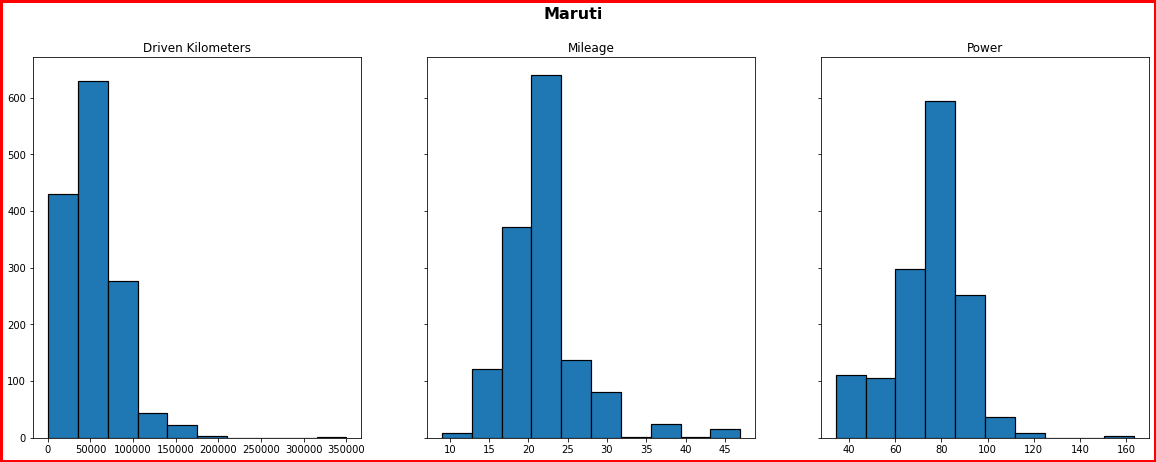

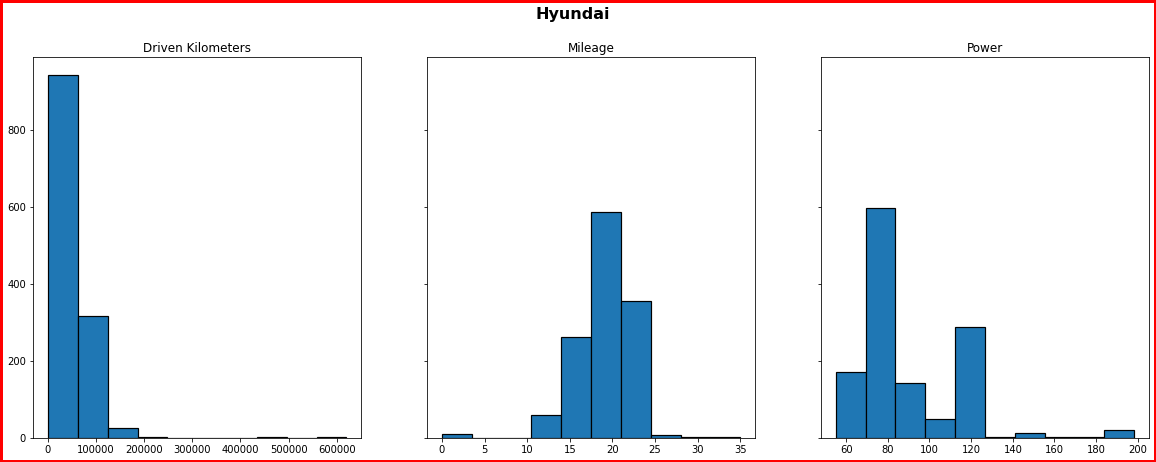

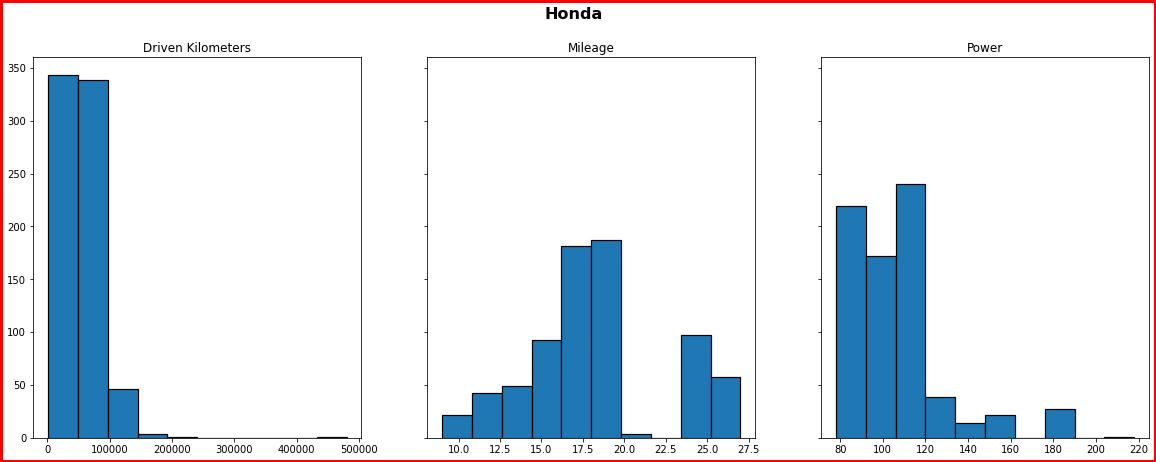

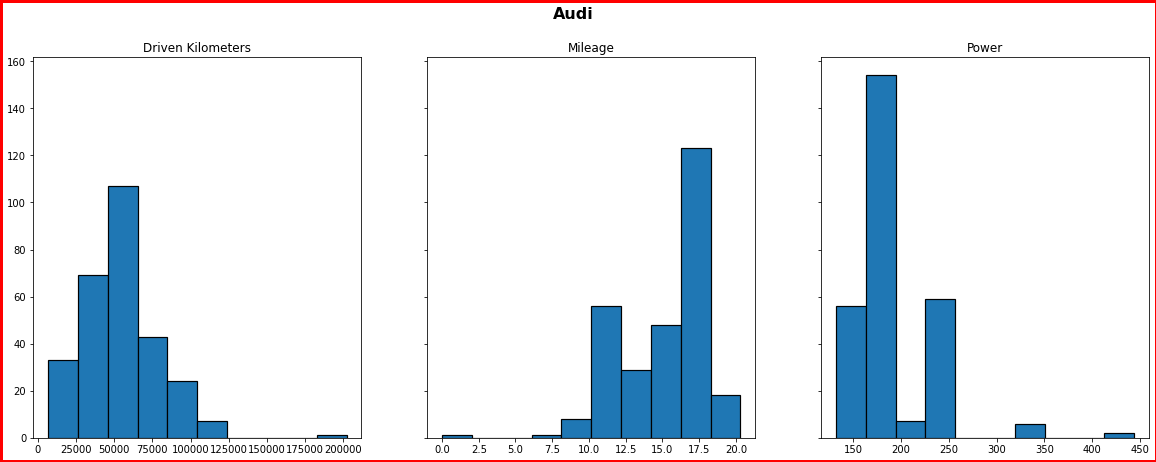

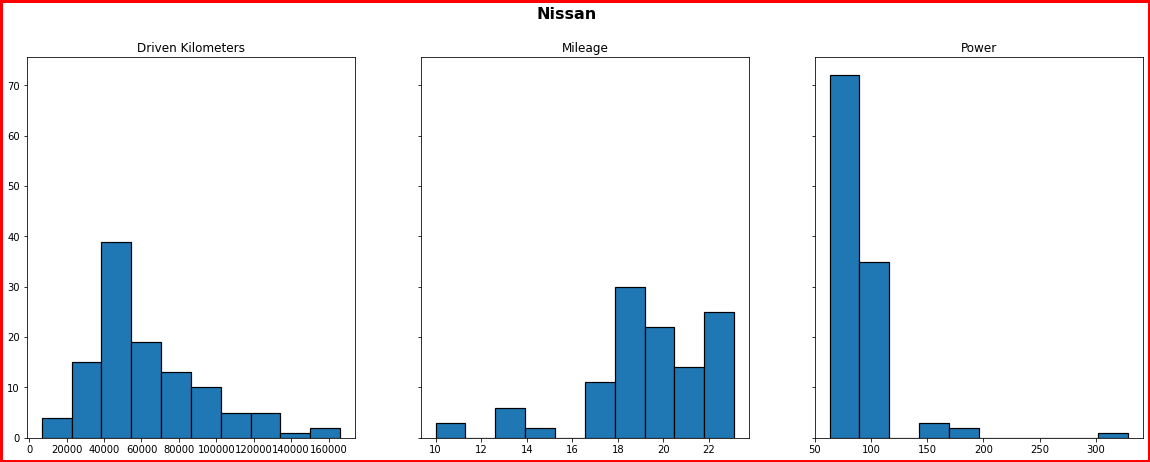

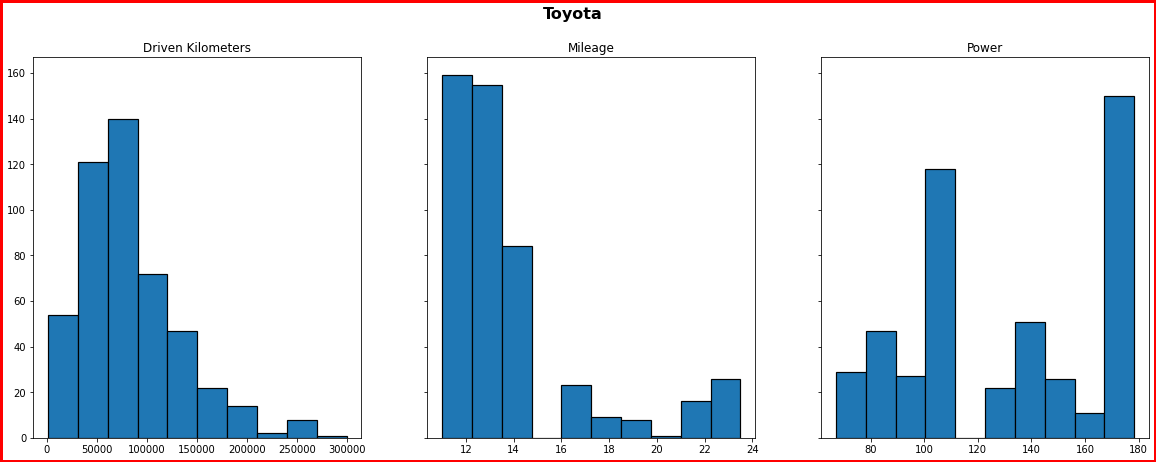

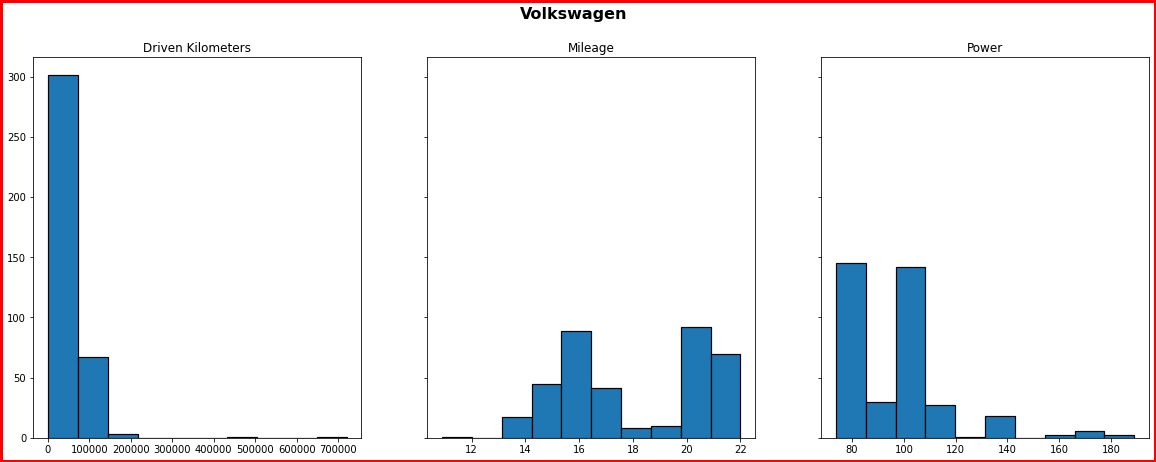

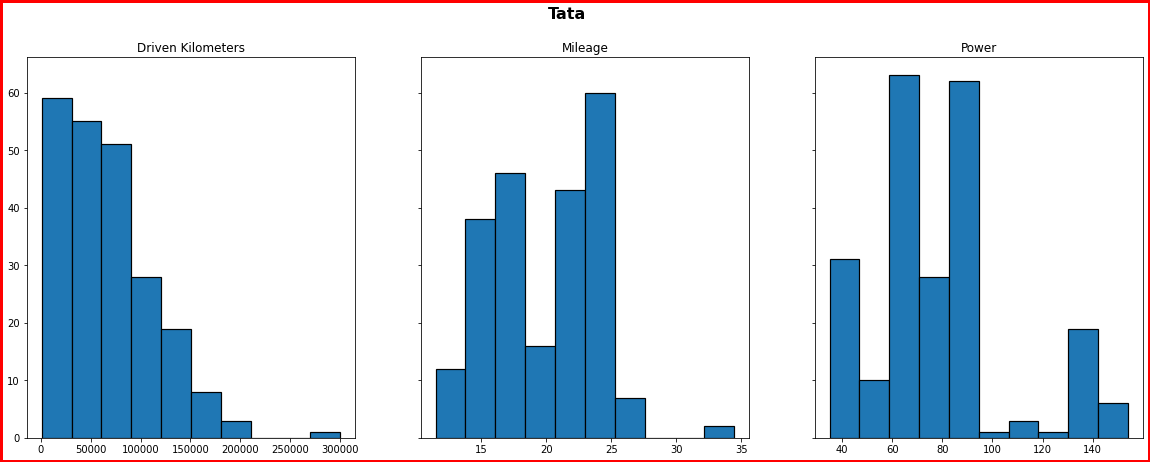

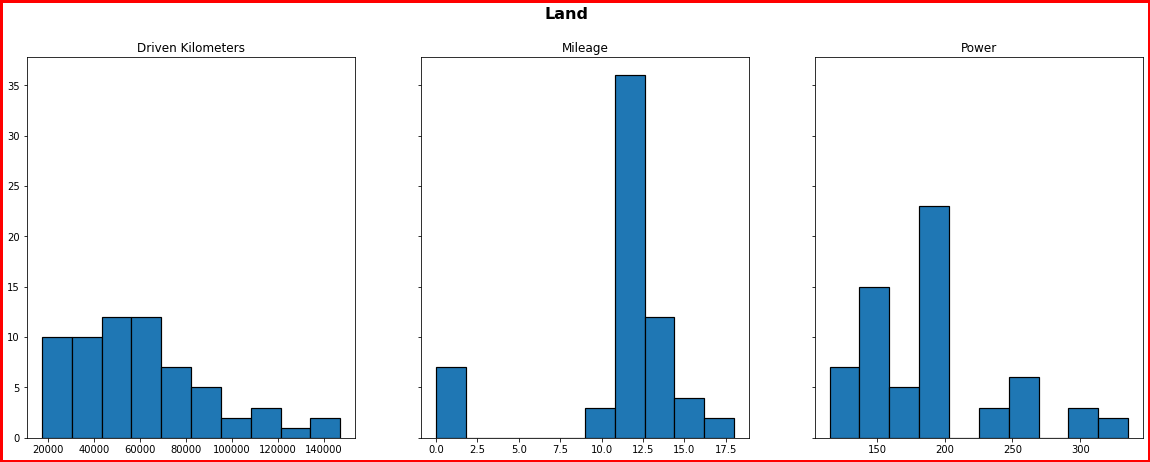

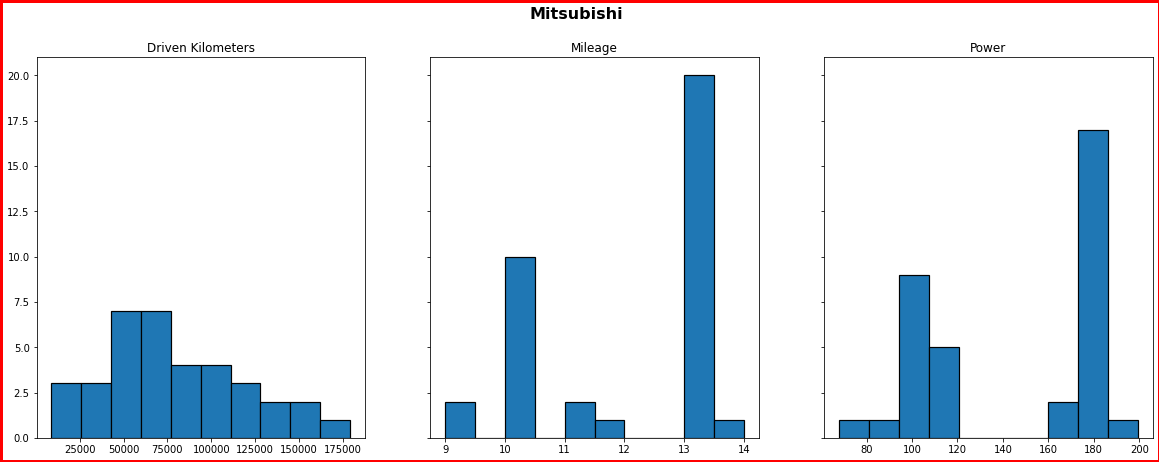

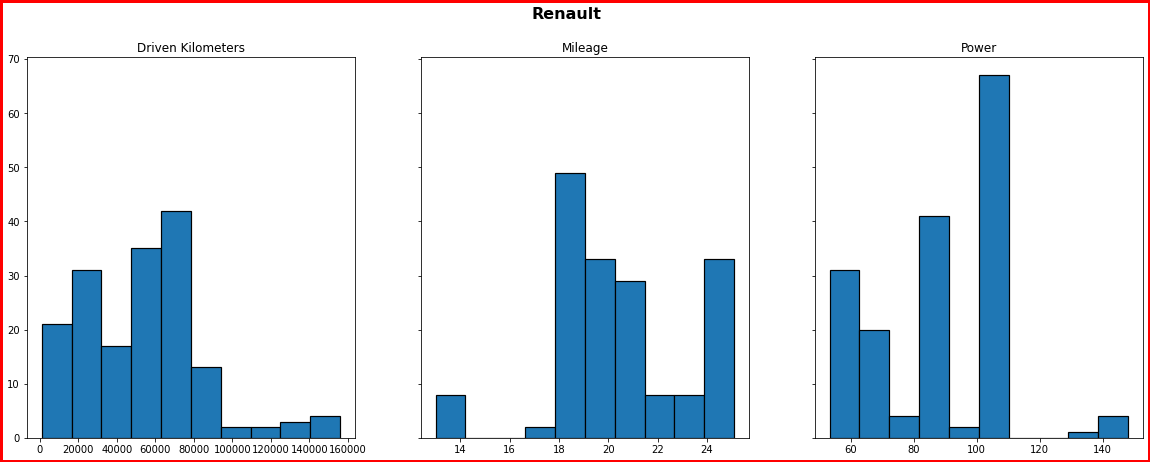

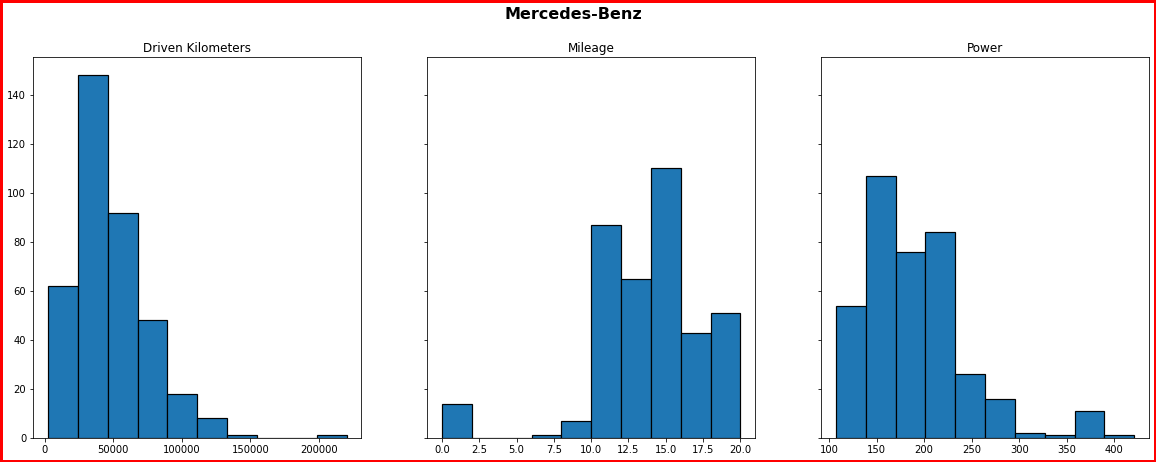

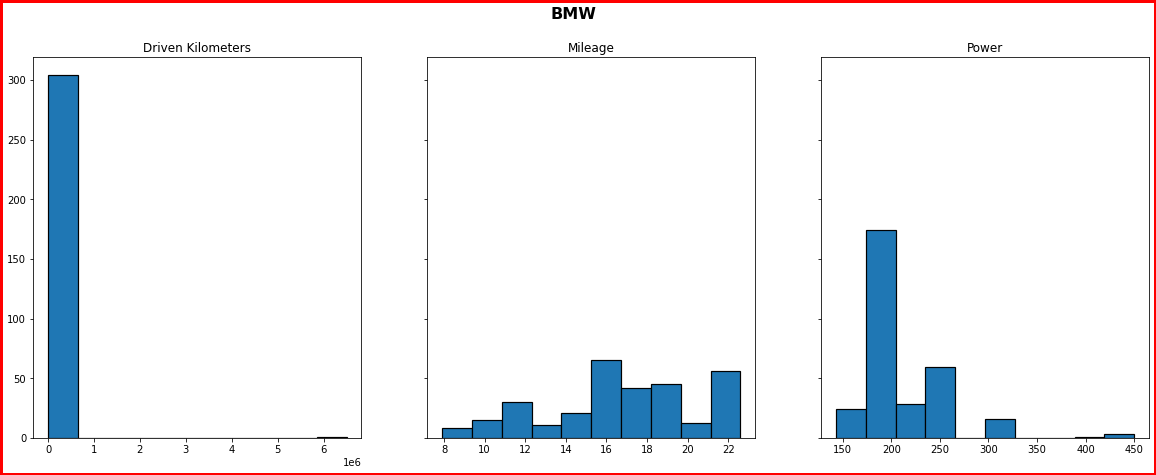

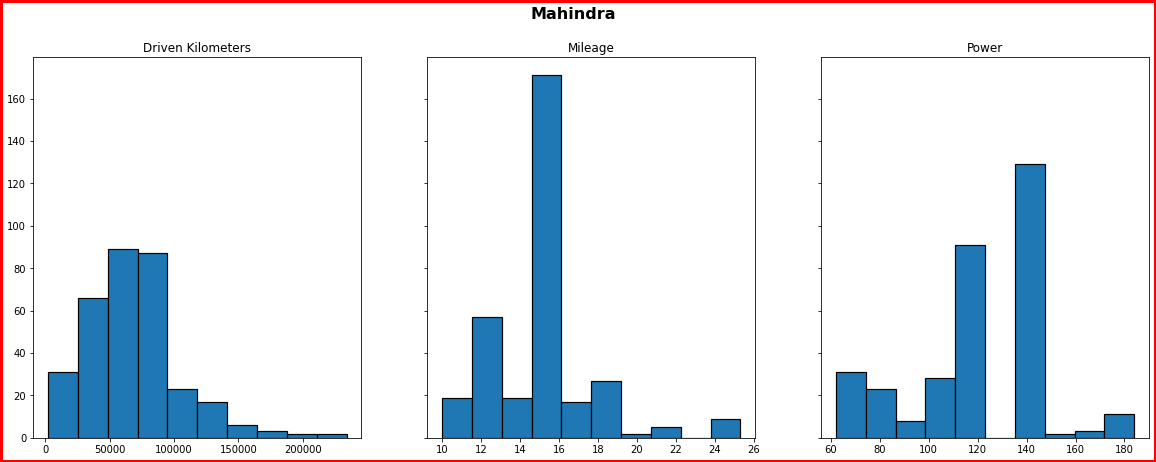

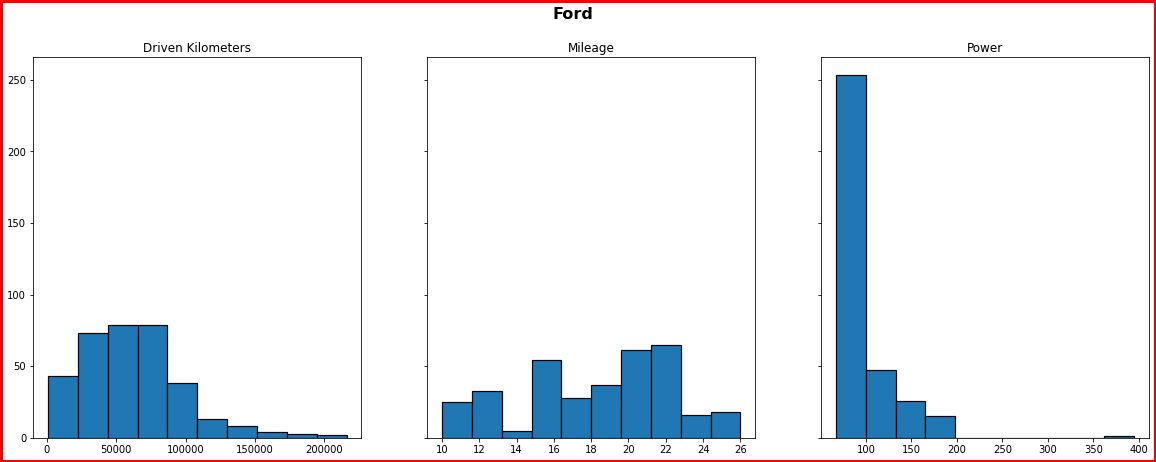

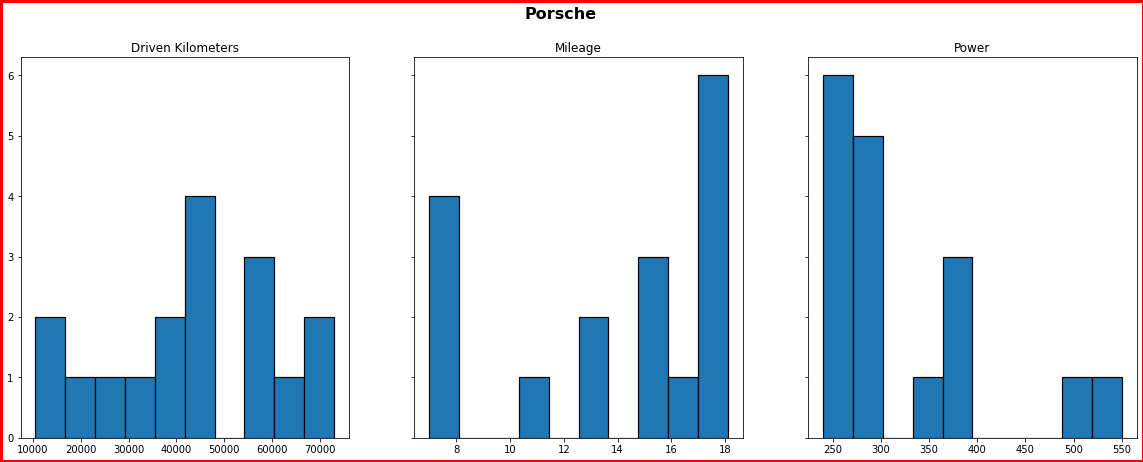

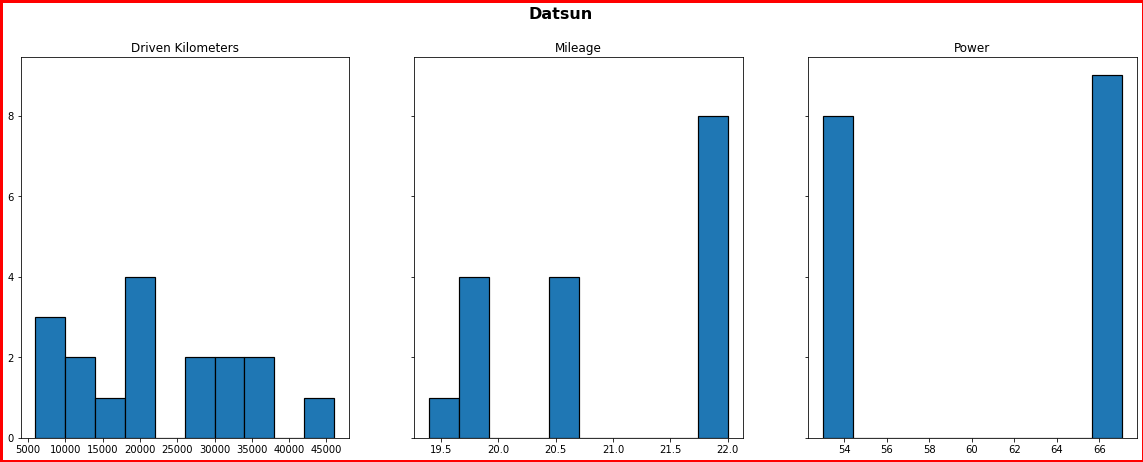

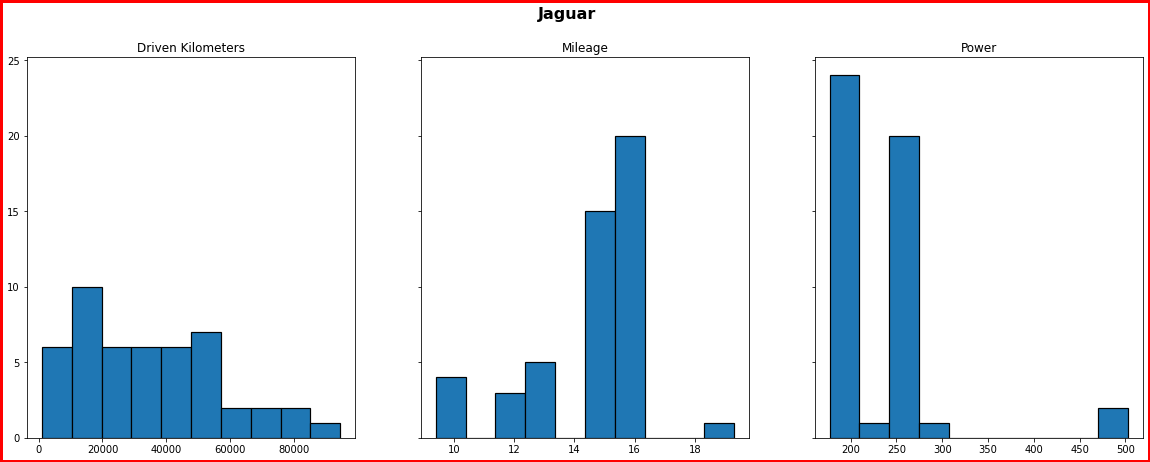

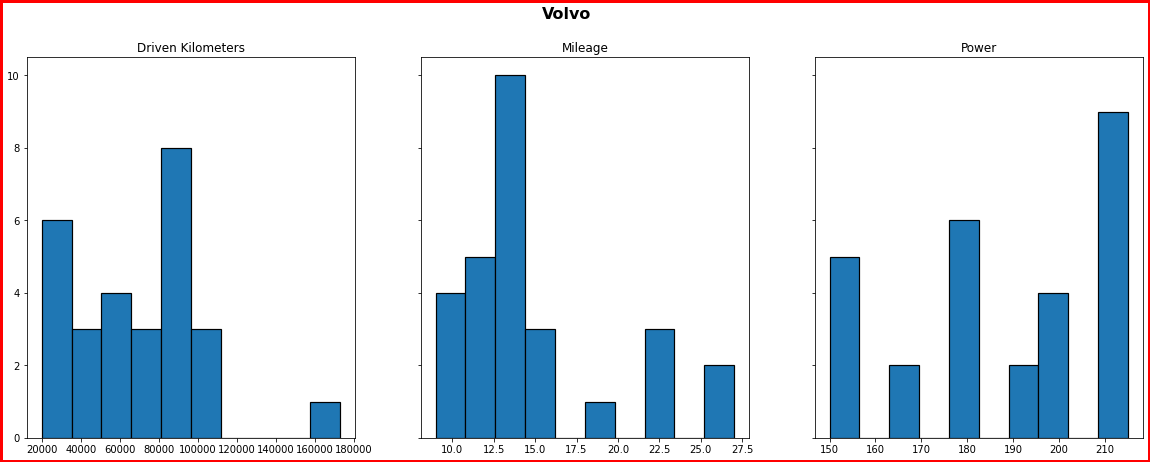

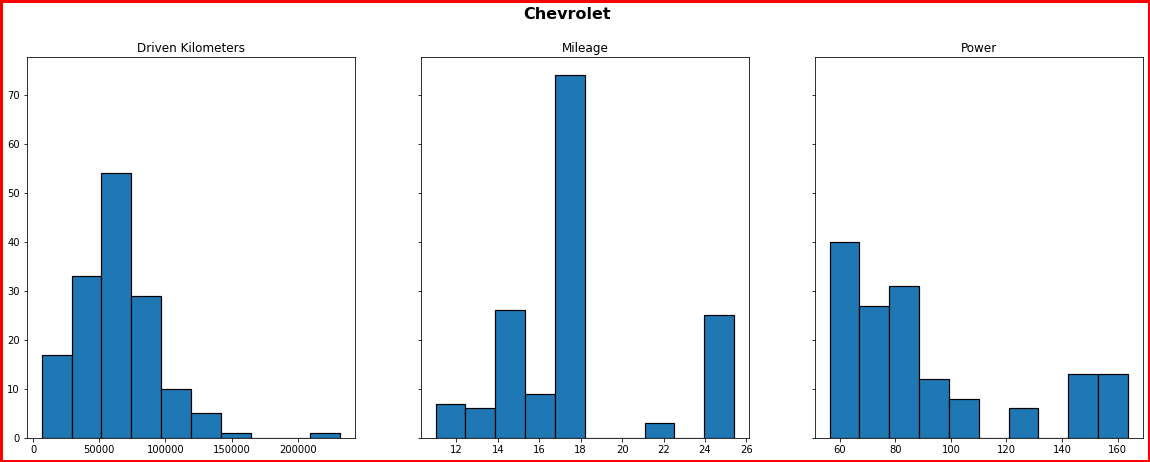

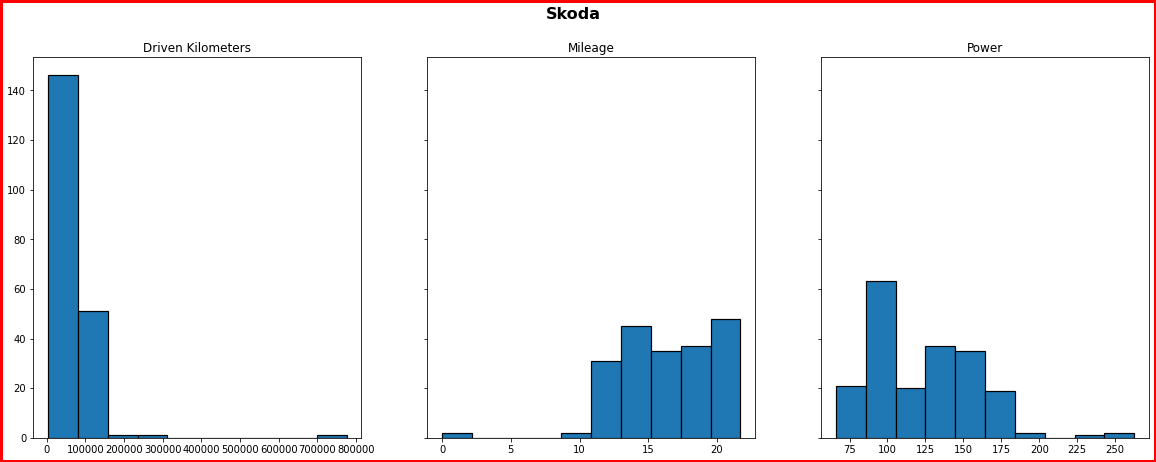

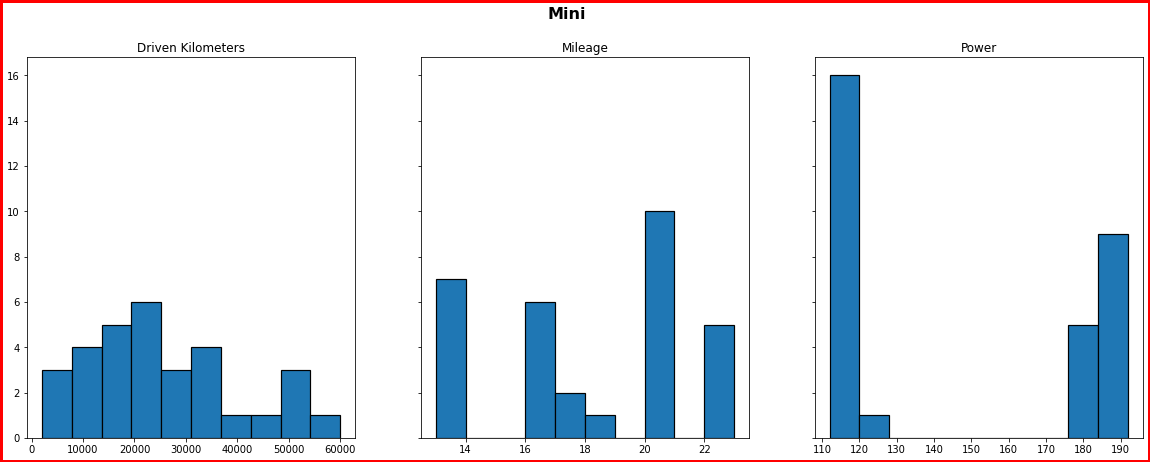

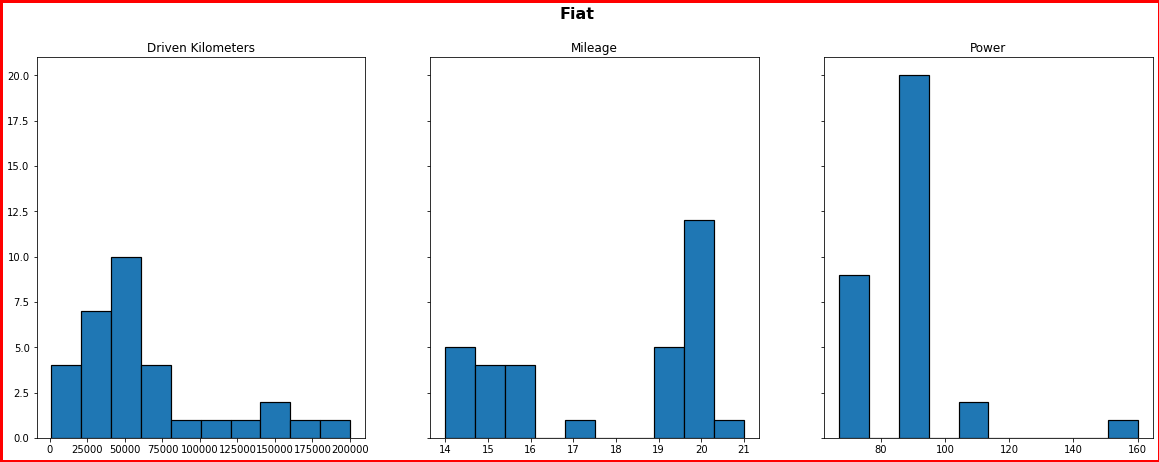

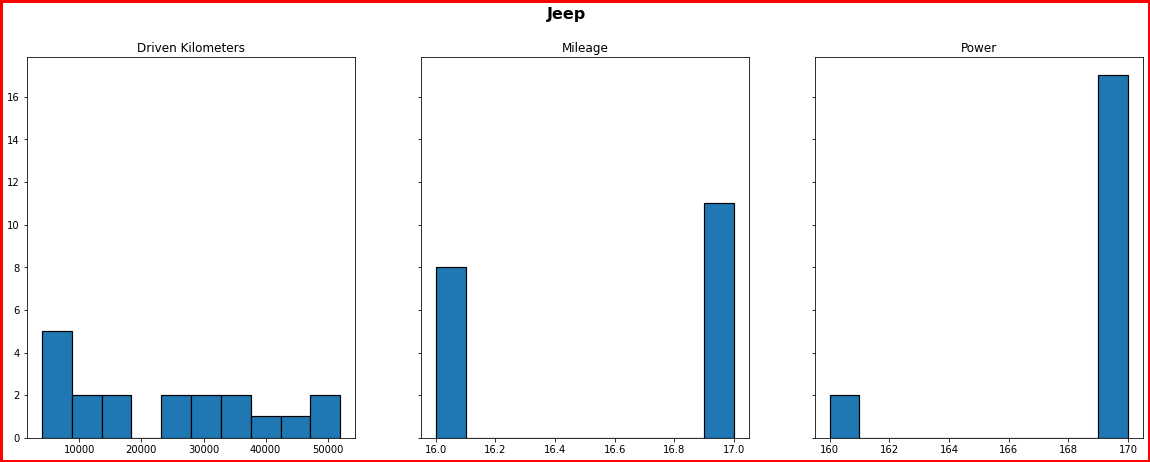

In [58]:
# creating graphs for different companies of number of cars vs different features
for company in comp:

    fig,ax=plt.subplots(1,3,sharey=True) # creating subplots

    # set figure height and width and border and title
    fig.set_figwidth(20)
    fig.set_figheight(7)
    fig.set_edgecolor('red')
    fig.set_linewidth(5)
    fig.suptitle(company,fontweight='bold',fontsize=16)

    
    ax[0].hist(company_collection[company].Kilometers_Driven,edgecolor='black',linewidth=1.2)
    #ax[0].xlabel("Driven Kilometers")
    #ax[0].ylabel("Number Of Cars")
    ax[0].set_title('Driven Kilometers',fontsize=12)

    
    ax[1].hist(company_collection[company].Mileage,edgecolor='black',linewidth=1.2)
    #ax[1].xlabel("Mileage(kmpl)")
    #ax[1].ylabel("Number Of Cars")
    ax[1].set_title('Mileage',fontsize=12)

    
    ax[2].hist(company_collection[company].Power,edgecolor='black',linewidth=1.2)
    #ax[2].xlabel("Power(kmpl)")
    #ax[2].ylabel("Number Of Cars")
    ax[2].set_title('Power',fontsize=12)

In [59]:
# storing mean of different features of cars and plotting them using seaborn library
kilo_driven = []
mileage = []
engine = []
power = []
seats = []
for company in comp:
    kilo_driven.append((company_collection[company].Kilometers_Driven).mean())
    mileage.append((company_collection[company].Mileage).mean())
    engine.append((company_collection[company].Engine).mean())
    power.append((company_collection[company].Power).mean())
    seats.append((company_collection[company].Seats).mean()) 

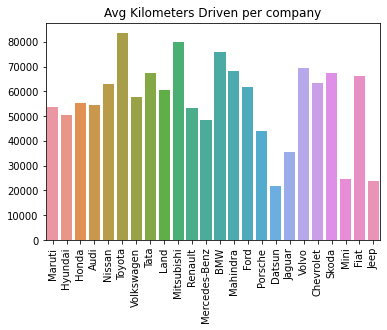

In [60]:
plt.xticks(rotation=90)
sb.barplot(x=comp,y=kilo_driven)
plt.title('Avg Kilometers Driven per company')
plt.show()

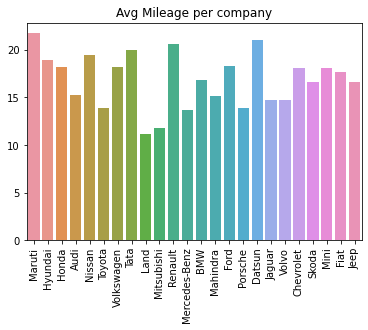

In [61]:
plt.xticks(rotation=90)
sb.barplot(x=comp,y=mileage)
plt.title('Avg Mileage per company')
plt.show()

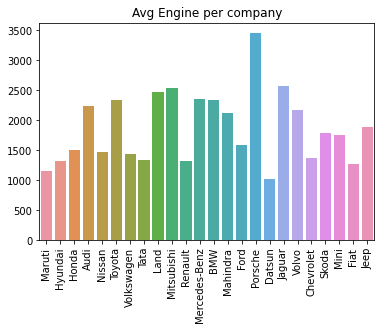

In [62]:
plt.xticks(rotation=90)
sb.barplot(x=comp,y=engine)
plt.title('Avg Engine per company')
plt.show()

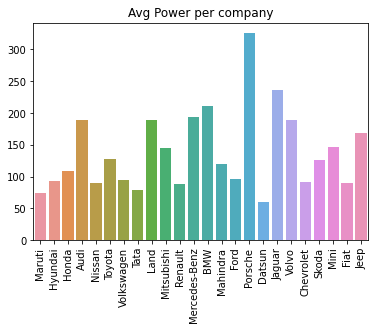

In [63]:
plt.xticks(rotation=90)
sb.barplot(x=comp,y=power)
plt.title('Avg Power per company')
plt.show()

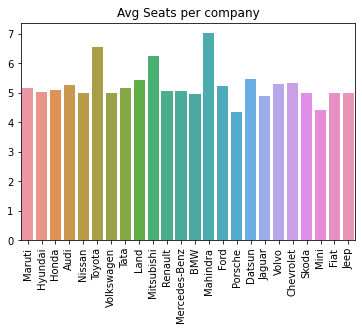

In [64]:
plt.xticks(rotation=90)
sb.barplot(x=comp,y=seats)
plt.title('Avg Seats per company')
plt.show()

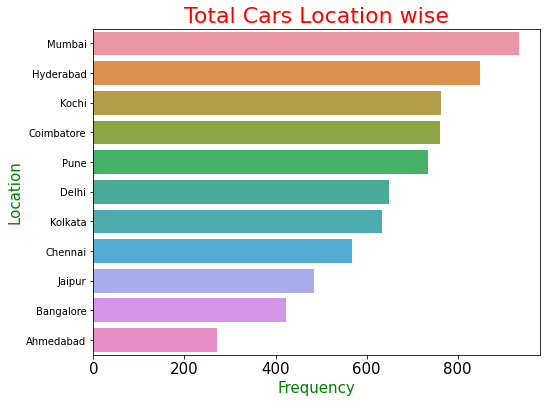

In [65]:
plt.figure(figsize=(8,6))
most_cat = data1['Location'].value_counts()
sb.barplot(x=most_cat, y=most_cat.index, data=data1)
plt.xticks(size=15)
plt.xlabel("Frequency",size=15,c="g")
plt.ylabel("Location",size=15,c="g")
plt.title("Total Cars Location wise",size=22,c="r")
plt.show()

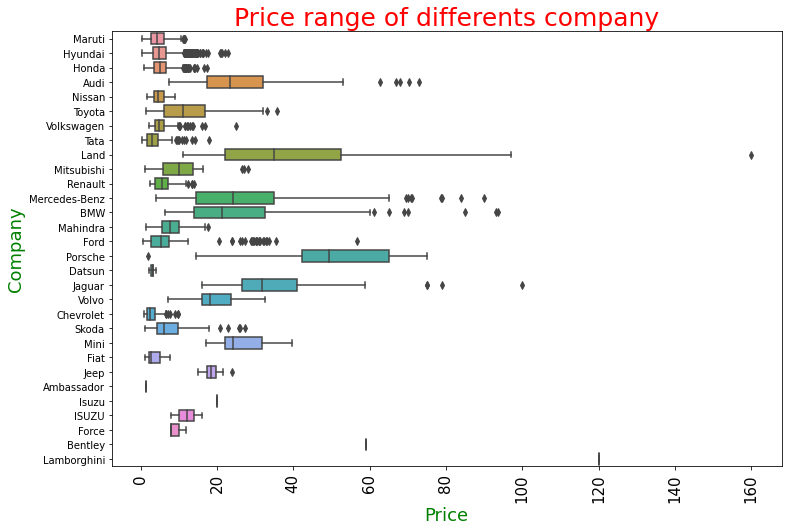

In [66]:
plt.figure(figsize=(12,8))
sb.boxplot(data=data_model,y="Company",x="Price")
plt.xlabel("Price",size=18,c="g")
plt.ylabel("Company",size=18,c="g")
plt.title("Price range of differents company",size=25,c="r")
plt.xticks(rotation='vertical',size=15)
plt.show()

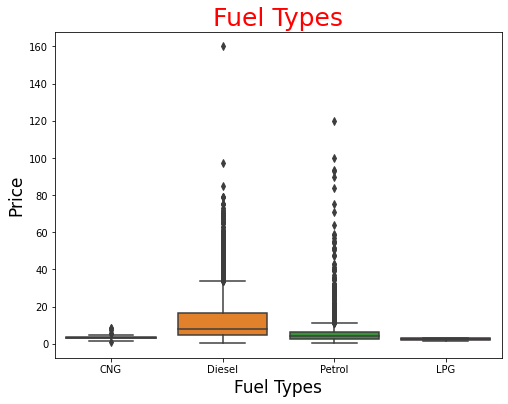

In [67]:
plt.figure(figsize=(8,6))

sb.boxplot(data=data,x="Fuel_Type",y="Price")
plt.xlabel("Fuel Types",size=17,c="k")
plt.ylabel("Price",size=17,c="k")
plt.title("Fuel Types",size=25,c="red")
sb.set_palette('hot_r')
plt.show()

In [68]:
def extract_region(x):
    if x == 'Delhi' or x == 'Jaipur':
        return 'North'
    elif x == 'Bangalore' or x == 'Chennai' or x == 'Coimbatore' or x == 'Hyderabad' or x == 'Kochi':
        return 'South'
    elif x == 'Kolkata':
        return 'East'
    if x == 'Mumbai' or x == 'Pune' or x == 'Ahmedabad':
        return 'West'
    
data['Region'] = data['Location'].apply(extract_region)

In [69]:
data

S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7193   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7194   7249                             Volkswagen Polo GT TSI      Mumbai   
7195   7250                             Nissan Micra Diesel XV     Kolkata   
7196   7251                             Volkswagen Polo GT TSI        Pune   
7197   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0     2010              72000       CNG       Manual      First  26.6 km/kg   
1     2015              41000    Diesel       Manual      First  19.67 kmpl   
2     2011              46000    Petrol       Manual      First   18.2 kmpl   
3     2012              87000    Diesel       Manual      First  20.77 kmpl   
4     2013              40670    Diesel    Automatic     Second   15.2 kmpl   
...    ...                ...       ...          ...        ...         ...   
7193  2011              89411    Diesel       Manual      First  20.54 kmpl   
7194  2015              59000    Petrol    Automatic      First  17.21 kmpl   
7195  2012              28000    Diesel       Manual      First  23.08 kmpl   
7196  2013              52262    Petrol    Automatic      Third   17.2 kmpl   
7197  2014              72443    Diesel    Automatic      First   10.0 kmpl   

       Engine      Power  Seats  New_Price  Price        Company Region  
0      998 CC  58.16 bhp    5.0        NaN   1.75         Maruti   West  
1     1582 CC  126.2 bhp    5.0        NaN  12.50        Hyundai   West  
2     1199 CC   88.7 bhp    5.0  8.61 Lakh   4.50          Honda  South  
3     1248 CC  88.76 bhp    7.0        NaN   6.00         Maruti  South  
4     1968 CC  140.8 bhp    5.0        NaN  17.74           Audi  South  
...       ...        ...    ...        ...    ...            ...    ...  
7193  1598 CC  103.6 bhp    5.0        NaN    NaN     Volkswagen  South  
7194  1197 CC  103.6 bhp    5.0        NaN    NaN     Volkswagen   West  
7195  1461 CC   63.1 bhp    5.0        NaN    NaN         Nissan   East  
7196  1197 CC  103.6 bhp    5.0        NaN    NaN     Volkswagen   West  
7197  2148 CC    170 bhp    5.0        NaN    NaN  Mercedes-Benz  South  

[7198 rows x 16 columns]

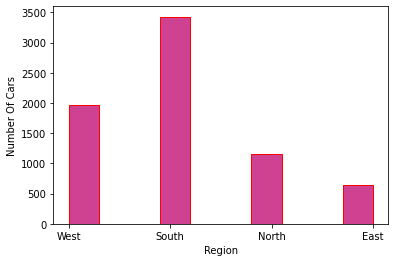

In [70]:
sb.set_palette('PiYG')
plt.hist(data['Region'],edgecolor='red')
plt.xlabel("Region")
plt.ylabel("Number Of Cars")
plt.show()

# Bivariate Analysis of other features vs price

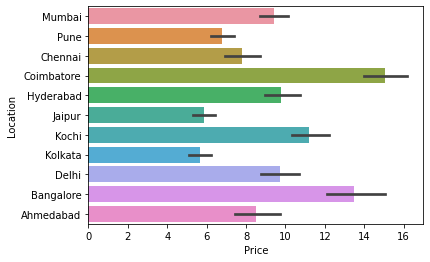

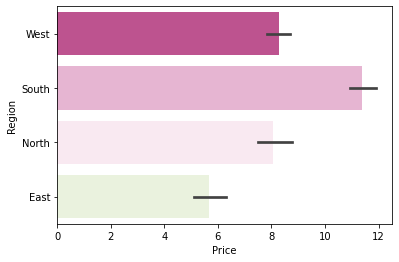

In [71]:
sb.barplot(y="Location", x="Price", data=data)
plt.show()

sb.barplot(y="Region", x="Price", data=data)
plt.show()

As we can see from the above to graphs price of car in Coimbatore and Banglore are highest where as it is lowest in Kolkata. Hence we can infer that the price of cars in the south is maximum and in the east it will be minimum. This is also shown in the second graph.

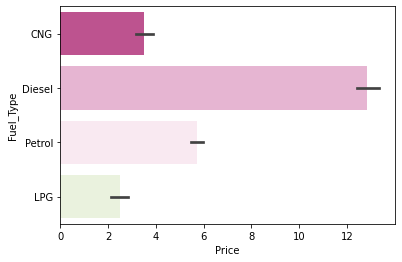

[[18, 367, 557, 1], [13, 362, 379, 1], [2, 340, 244, 0], [0, 430, 340, 0], [3, 593, 273, 6], [0, 276, 215, 4], [9, 357, 401, 0], [1, 315, 331, 0], [12, 359, 284, 0], [1, 270, 160, 0], [3, 169, 102, 0]]


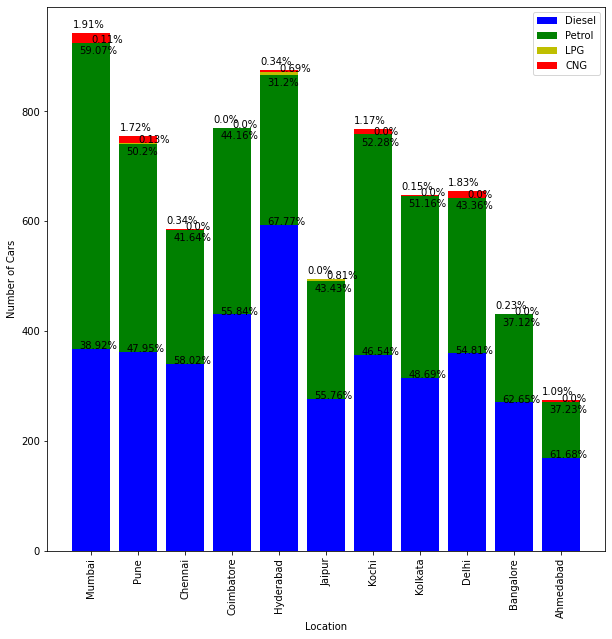

In [72]:
# here we have made a barplot of Fuel_Type vs Price
# other graph shows how many cars are there at a location and composition of it by fuel
sb.barplot(y="Fuel_Type", x="Price", data=data)
plt.show()

#lets check what fuel is used in what Location what fuel is used and how much
location = data['Location'].unique()

loc_fuel_data=[]
fuels=['CNG','Diesel','Petrol', 'LPG']
for i in range(len(location)):
    loc_fuel_data.append([0,0,0,0])
    for j in range(data.shape[0]):
        if data['Location'][j]==location[i]:
            loc_fuel_data[-1][fuels.index(data['Fuel_Type'][j])]+=1
print(loc_fuel_data)
cng=[]
diesel=[]
petrol=[]
lpg=[]
for i in loc_fuel_data:
    cng.append(i[0])
    diesel.append(i[1])
    petrol.append(i[2])
    lpg.append(i[3])
    
plt.figure(figsize=(10,10))
plt.bar(location,diesel, color='b')
b1=[a+b for a, b in zip(diesel, petrol)]
b2=[a+b+c for a, b,c in zip(diesel, lpg, petrol)]
plt.bar(location,petrol,bottom=diesel , color='g')
plt.bar(location,lpg,bottom=b1 , color='y')
plt.bar(location,cng , bottom=b2, color='r')
plt.xlabel("Location")
plt.ylabel("Number of Cars")
plt.legend(["Diesel","Petrol","LPG","CNG"])
plt.xticks(rotation=90)
for i in range(11):
    total = diesel[i]+petrol[i]+lpg[i]+cng[i]
    d_perc = round(diesel[i]/total*100,2)
    p_perc = round(petrol[i]/total*100,2)
    l_perc = round(lpg[i]/total*100,2)
    c_perc = round(cng[i]/total*100,2)
   
    plt.annotate(text =str(d_perc)+str('%') ,xy=(i-0.25,diesel[i]))
    plt.annotate(text =str(p_perc)+str('%') ,xy=(i-0.25,diesel[i]+petrol[i]-20))
    plt.annotate(text =str(l_perc)+str('%') ,xy=(i-0,diesel[i]+petrol[i]+lpg[i]))
    plt.annotate(text =str(c_perc)+str('%') ,xy=(i-0.40,diesel[i]+petrol[i]+lpg[i]+cng[i]+10))
    
        
plt.show()

    

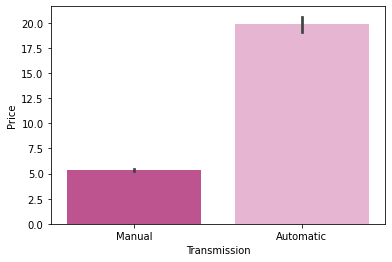

[[589, 354], [587, 168], [452, 134], [467, 303], [643, 232], [433, 62], [523, 244], [560, 87], [453, 202], [254, 177], [202, 72]]


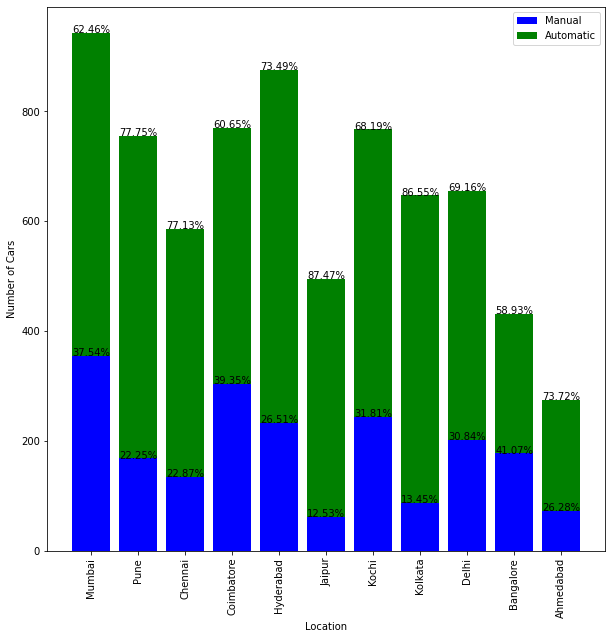

In [73]:
# here we have made a barplot of Type of Transmission vs Price
# other graph shows how many cars are there at a location and composition of it by type of Transmission
sb.barplot(x="Transmission", y="Price", data=data)
plt.show()

loc_transmission_data=[]
transmission=['Manual','Automatic']
for i in range(len(location)):
    loc_transmission_data.append([0,0])
    for j in range(data.shape[0]):
        if data['Location'][j]==location[i]:
            loc_transmission_data[-1][transmission.index(data['Transmission'][j])]+=1
print(loc_transmission_data)
manual=[]
automatic=[]

for i in loc_transmission_data:
    manual.append(i[0])
    automatic.append(i[1])
    
plt.figure(figsize=(10,10))
plt.bar(location,automatic, color='b')
b1=[a+b for a, b in zip(automatic, manual)]
plt.bar(location,manual,bottom=automatic , color='g')
plt.xlabel("Location")
plt.ylabel("Number of Cars")
plt.legend(["Manual","Automatic"])
plt.xticks(rotation=90)

for i in range(11):
    total = manual[i]+automatic[i]
    m_perc = round(manual[i]/total*100,2)
    a_perc = round(automatic[i]/total*100,2)
    plt.annotate(text =str(a_perc)+str('%') ,xy=(i-0.4,automatic[i]))
    plt.annotate(text =str(m_perc)+str('%') ,xy=(i-0.4,manual[i]+automatic[i]))
    
        
plt.show()



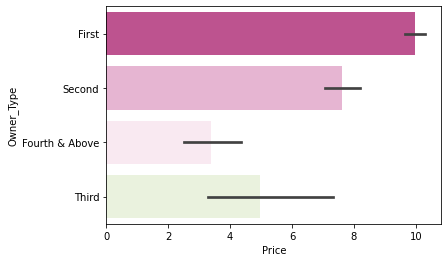

In [74]:
# barplot of Price vs Owner Type
sb.barplot(x="Price", y="Owner_Type", data=data)
plt.show()

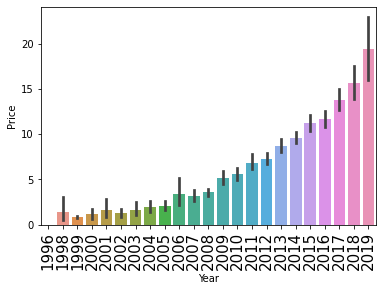

In [75]:
# barplot price vs year
sb.barplot(x="Year", y="Price", data=data)
plt.xticks(rotation='vertical',size=15)
plt.show()

In [76]:
# The dendrogram shows the correlation between 2 companies.
dendrogram_arr=[]
labels=[]
for key in company_collection:
    labels.append(key)
    d_ar=[]
    for i in ['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']:
        d_ar.append(company_collection[key][i].mean())
    dendrogram_arr.append(d_ar)

fig = ff.create_dendrogram(np.array(dendrogram_arr), labels=labels)
fig.update_layout(width=800, height=500)
fig.show()



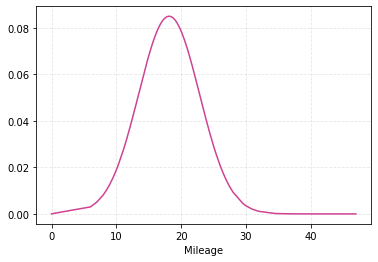

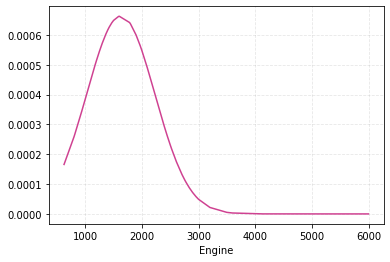

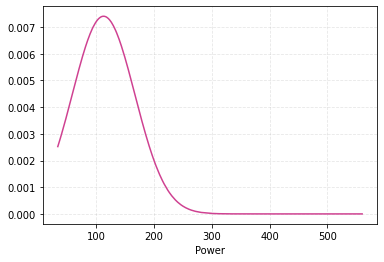

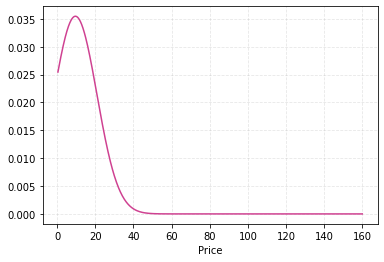

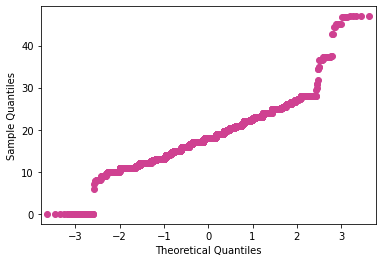

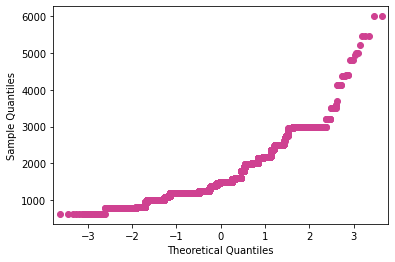

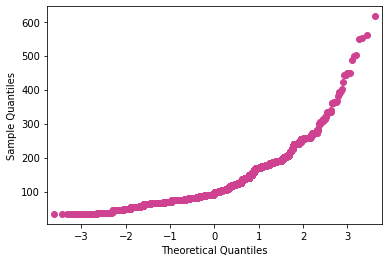

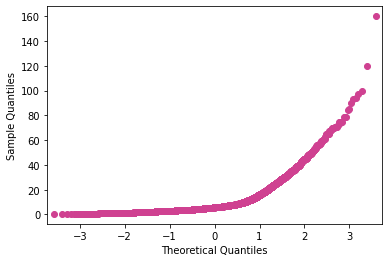

In [77]:
continuous=['Mileage','Engine', 'Power', 'New_Price', 'Price']

#Checking for Gaussian distributions
list_gaussian_distri=[]
for x in range(len(continuous)):
    df_mean = np.mean(data_model[continuous[x]])
    df_std = np.std(data_model[continuous[x]])
    #Try and except block for checking gaussian by floating point error
    try:
        # Calculating probability density function (PDF)
        pdf = stats.norm.pdf(data_model[continuous[x]].sort_values(), df_mean, df_std)
        #Appending the gaussian to the initially declared list
        list_gaussian_distri.append(continuous[x])
    except TypeError:
        continue
        
    #Plotting their graphs for cross verifications
    plt.plot(data_model[continuous[x]].sort_values(), pdf)
    plt.xlabel(continuous[x])
    
    plt.grid(True, alpha=0.3, linestyle="--")
    plt.show()




for gaussians in list_gaussian_distri:
    fig = sm.qqplot(data1[gaussians].dropna())
    plt.show()

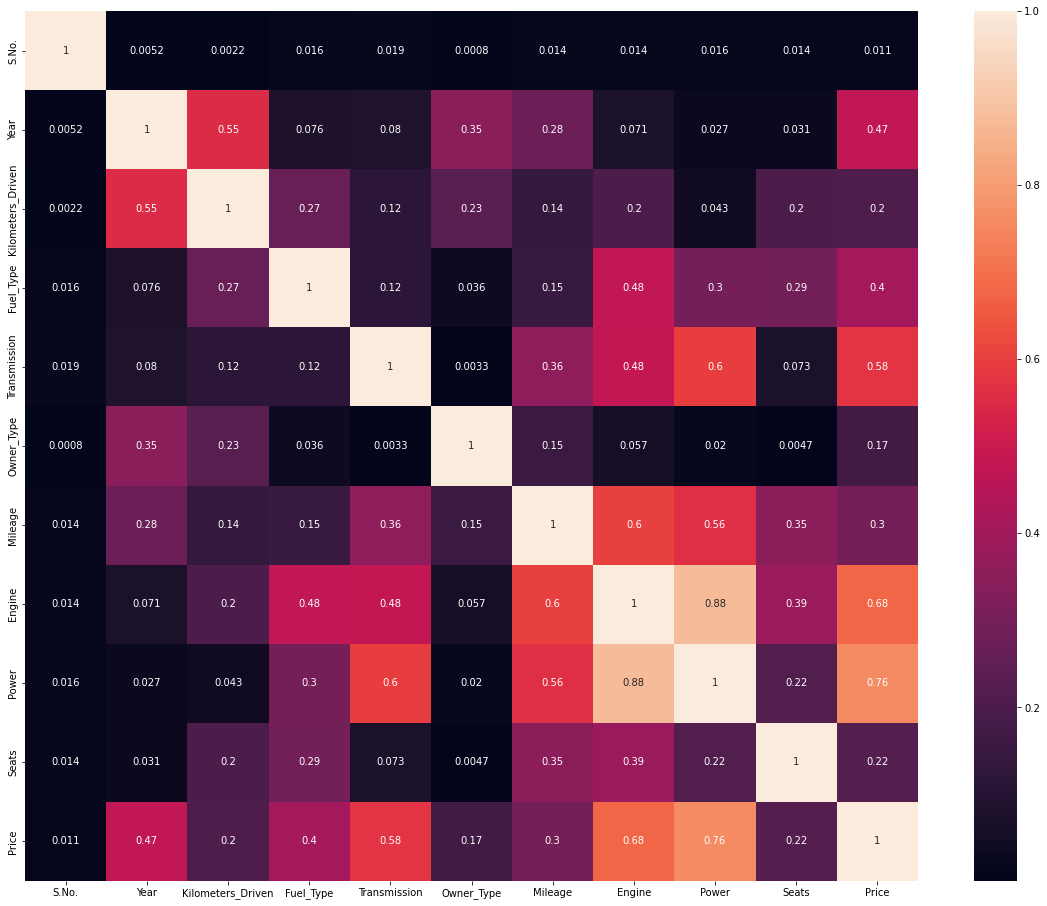

In [78]:
# Here I have constructed the heat map showing pairwise correlation
corrMatrix = data_model.corr(method='spearman') # Use spearman for non-linear
fig, ax = plt.subplots(figsize=(20,16))
sb.heatmap(abs(corrMatrix), annot=True) # Show absolute value
plt.show()

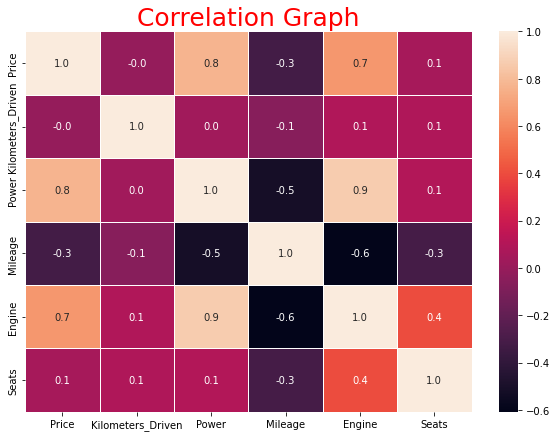

In [79]:
plt.figure(figsize=(10,7))
sb.heatmap(data_model[["Price","Kilometers_Driven","Power","Mileage","Engine","Seats"]].corr(), annot=True,linewidths=.5,fmt='.1f')
plt.title("Correlation Graph",c="r",size=25)
plt.show()



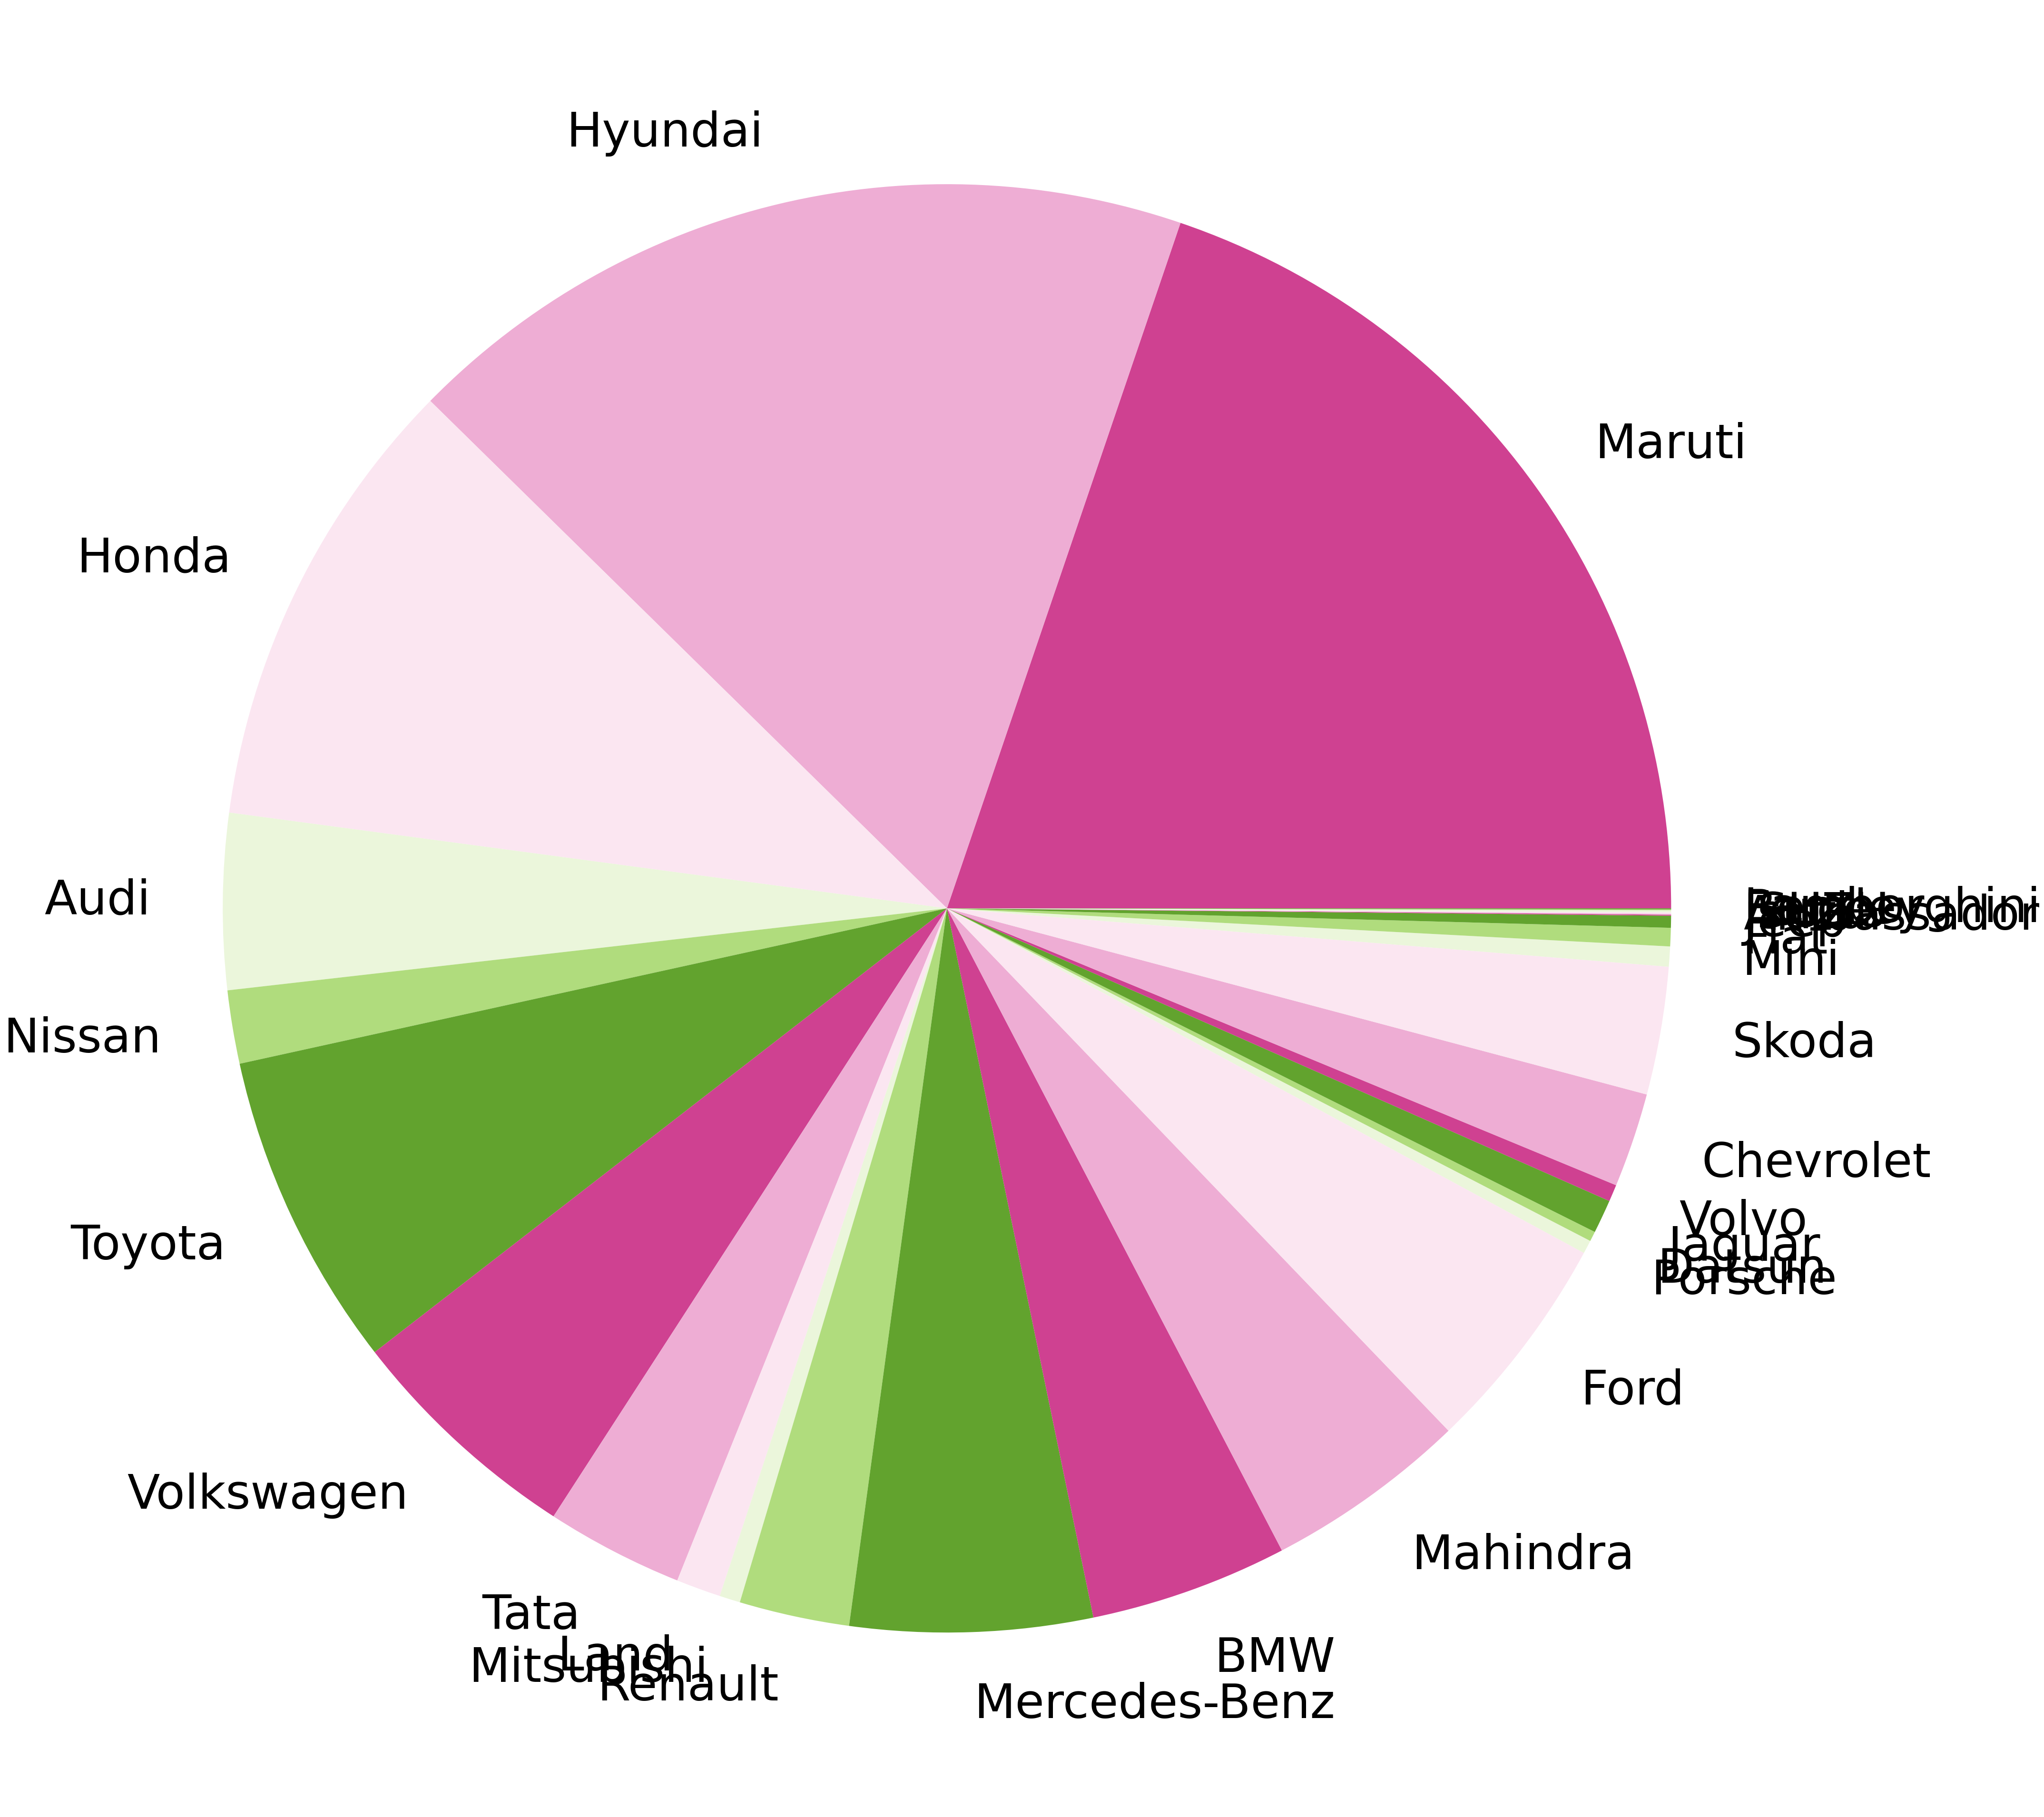

In [80]:
#General Pie chart for suicides vs countries
frequencies=data_model["Company"].value_counts(sort=False)
start=0
pdata=[]
for i in range(len(frequencies)):
    
    pdata.append(sum(data_model["Kilometers_Driven"][start:frequencies[i]]))
    pdata[-1]=int(pdata[-1])

plt.figure(figsize =(100, 70))
plt.rc('xtick', labelsize=100)
plt.pie(pdata, labels = list(pd.unique(data_model["Company"])))
plt.show()

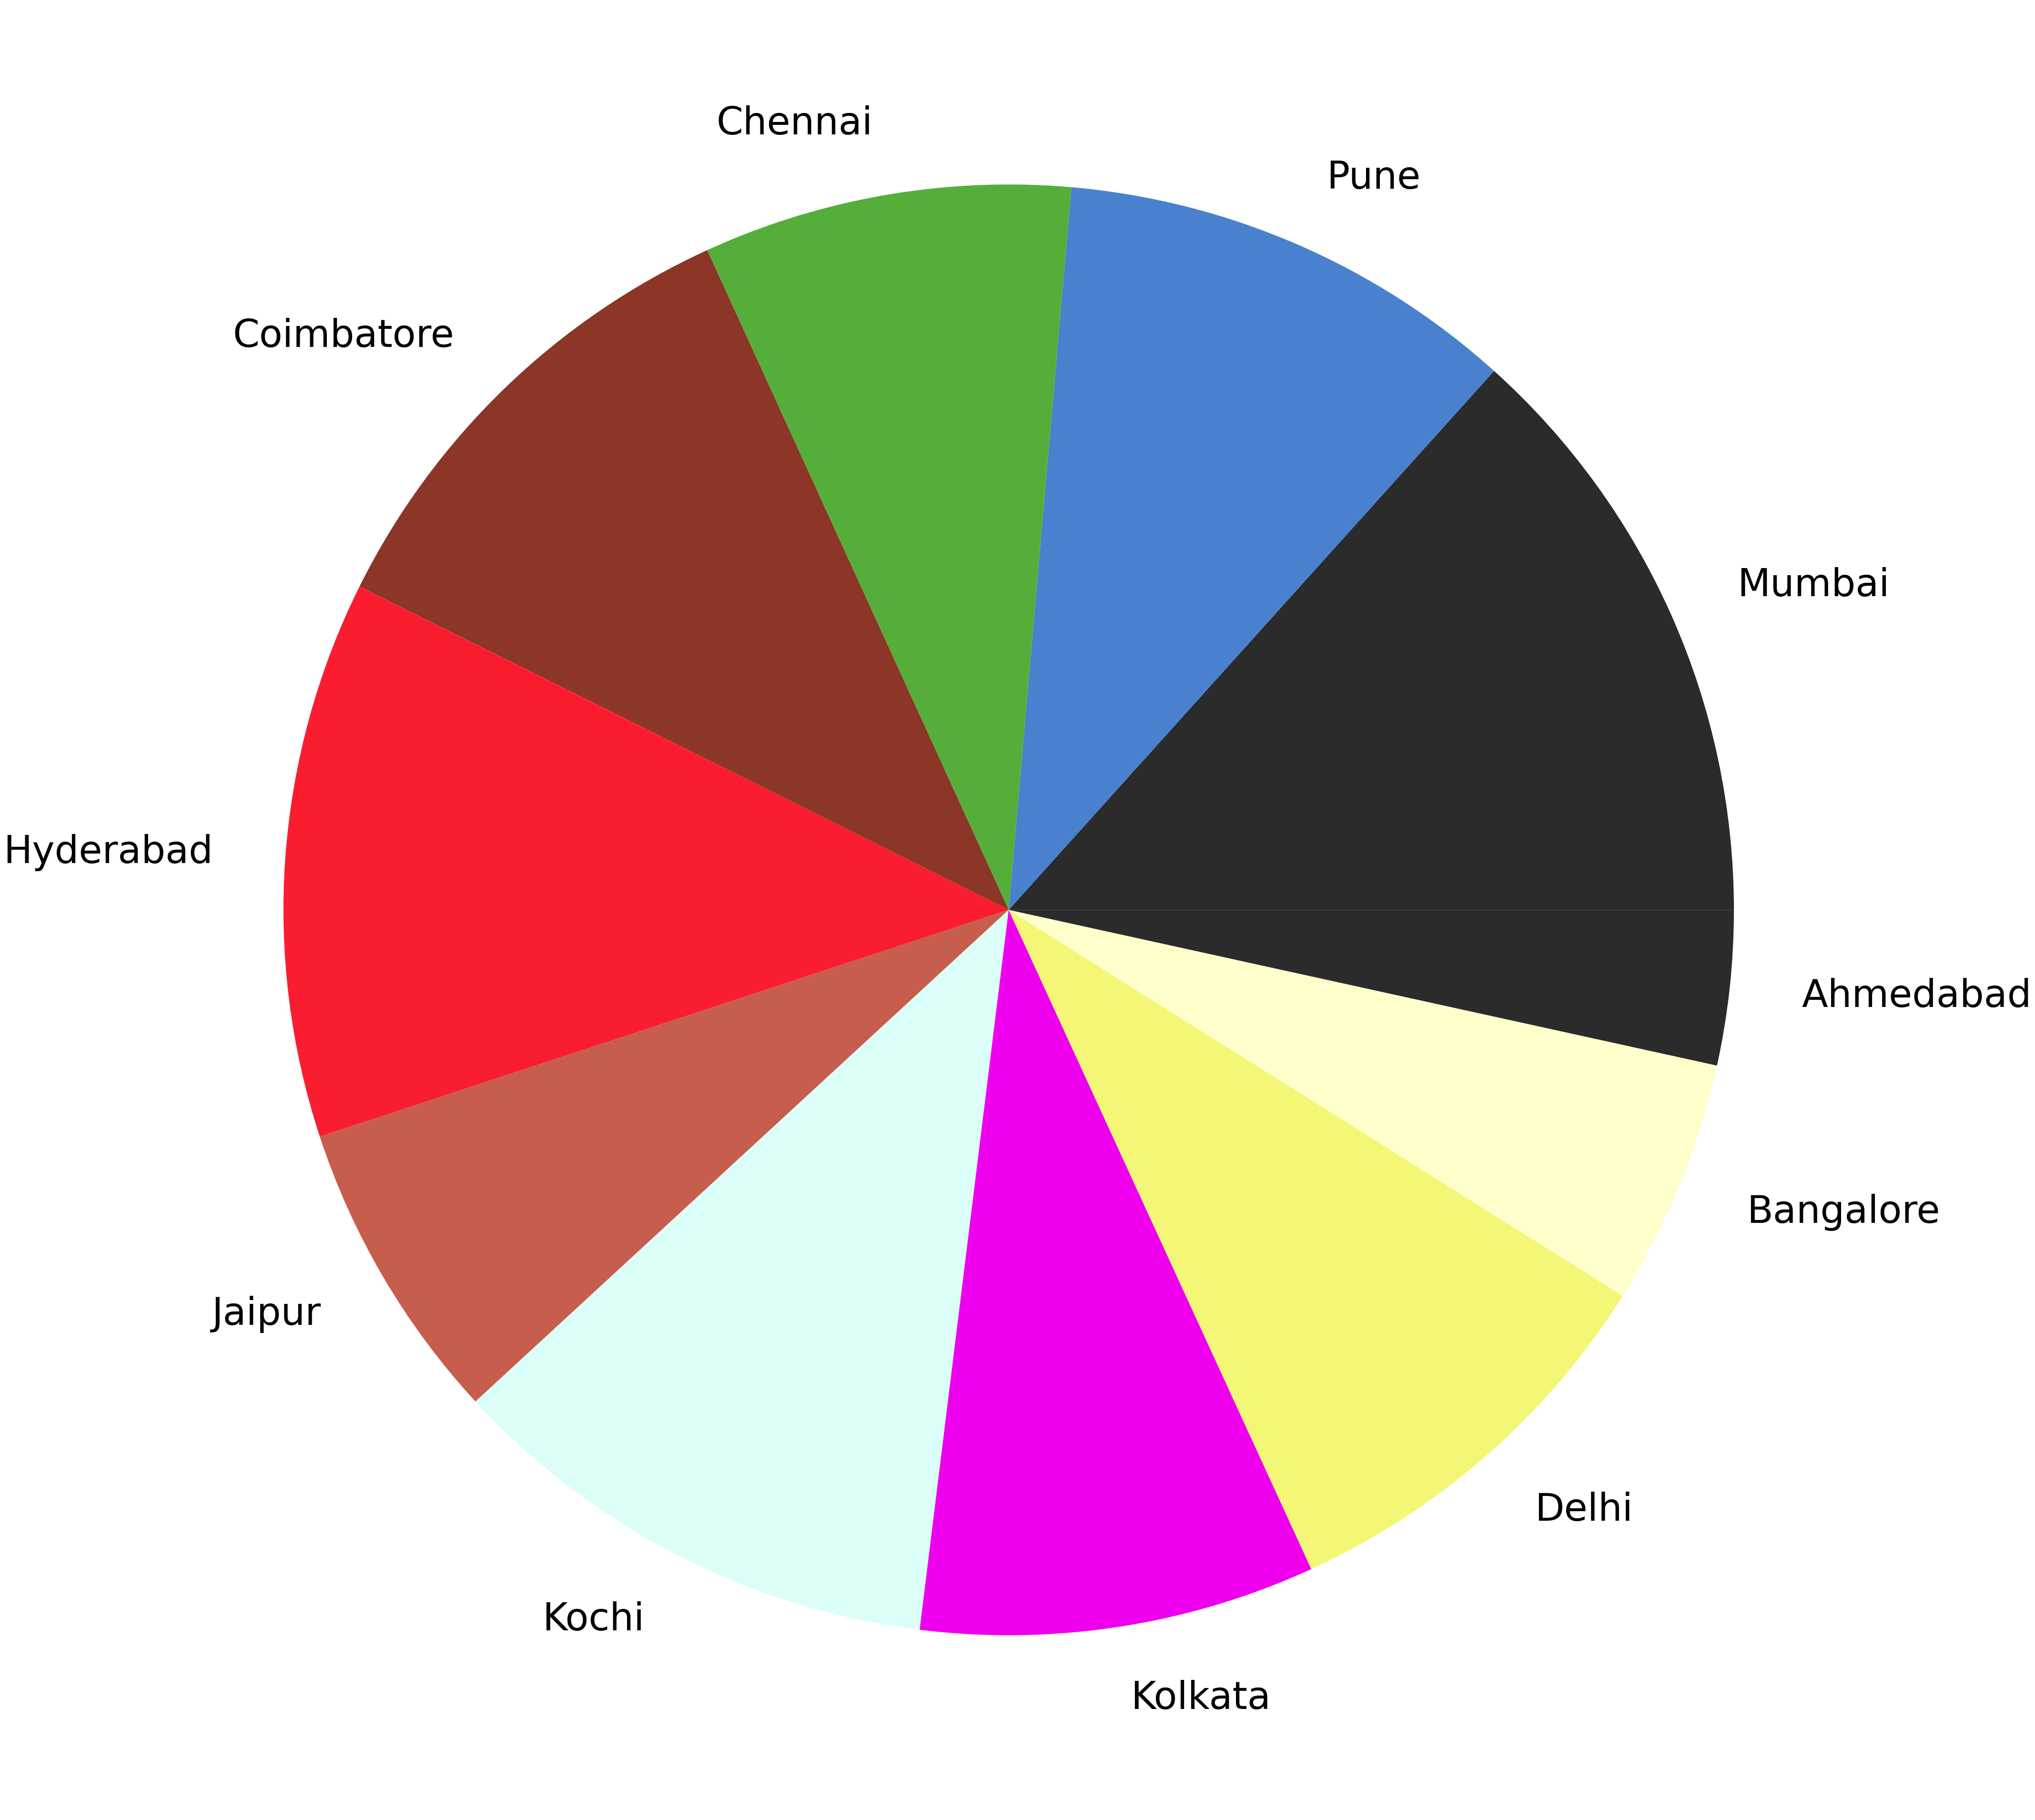

In [81]:
#General Pie chart for suicides vs countries
frequencies=data_model["Location"].value_counts(sort=False)
start=0
pdata=[]
for i in range(len(frequencies)):
    
    pdata.append(sum(data_model["Price"][start:frequencies[i]]))
    pdata[-1]=int(pdata[-1])

plt.figure(figsize =(100, 70))
plt.rc('xtick', labelsize=80)
plt.pie(pdata, labels = list(pd.unique(data_model["Location"])),colors=['#2B2B2B', '#4981CE',"#55AE3A","#8B3626","#FA1D2F", '#C75D4D',"#DBFEF8","#EE00EE","#F4F776","#FFFFCC"])
plt.show()

In [82]:
data_for_scatter=data_model[['Company','Mileage','Price','Fuel_Type']]

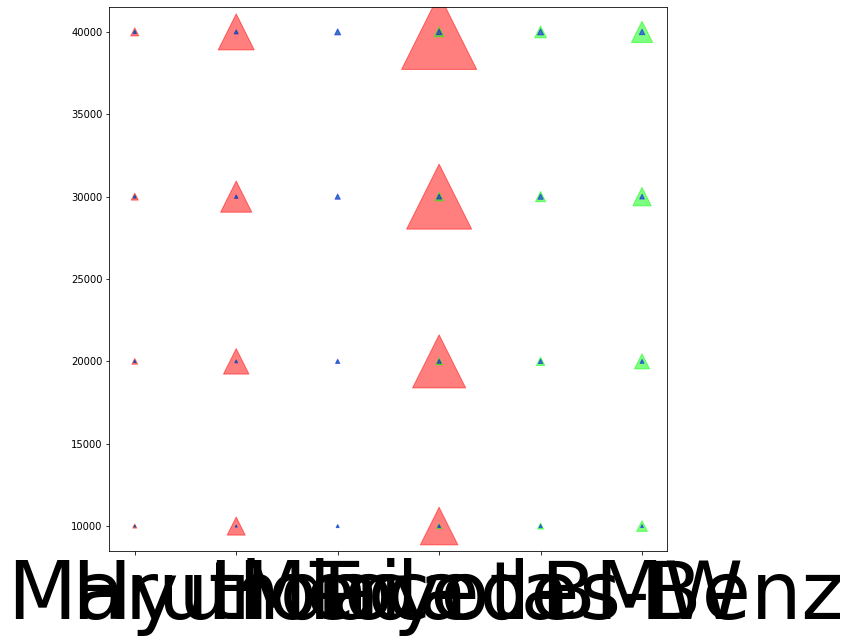

In [83]:
#the below scatter plot shows the cost of using a particular car for a particular aim of kilometers as price of car+aim/mileage*cost of fuel
#The size of the triangle represents the cost, the color the type of fuel, x axis the company, y axis the aim of no. of kilometers one wants to drive
plt.figure(figsize=(10,10))
for j in [10000,20000,30000,40000]:
    for c in ["Maruti", "Hyundai", "Honda", "Toyota", "Mercedes-Benz", "BMW"]:
        m_cng=0
        m_petrol=0
        m_diesel=0
        l_cng=0
        l_petrol=0
        l_diesel=0
        p_cng=0
        p_petrol=0
        p_diesel=0
        f_cng=1
        f_petrol=1
        f_diesel=1
        for i in range(data_for_scatter.shape[0]):
            if c==data_for_scatter['Company'][i]:
                if data_for_scatter['Fuel_Type'][i]==2:
                    m_cng+=data_for_scatter['Mileage'][i]
                    p_cng+=data_for_scatter['Price'][i]
                    l_cng+=1
                elif data_for_scatter['Fuel_Type'][i]==0:
                    m_petrol+=data_for_scatter['Mileage'][i]
                    p_petrol+=data_for_scatter['Price'][i]
                    l_petrol+=1
                elif data_for_scatter['Fuel_Type'][i]==1:
                    m_diesel+=data_for_scatter['Mileage'][i]
                    p_diesel+=data_for_scatter['Price'][i]
                    l_diesel+=1
        if l_cng==0:
            f_cng=0
            l_cng=1
            m_cng=1
        if l_petrol==0:
            f_petrol=0
            l_petrol=1
            m_petrol=1
        if l_diesel==0:
            f_diesel=0
            l_diesel=1
            m_diesel=1
        plt.scatter(np.array([c,c,c]),np.array([j,j,j]),np.array([f_cng*(p_cng/l_cng+j/m_cng*86)/30, f_petrol*(p_petrol/l_petrol+j/m_petrol*100)/30, f_diesel*(p_diesel/l_diesel+j/m_diesel*90)/30]),c=[(1,0,0),(0,1,0), (0,0,1)],cmap=plt.cm.get_cmap('RdYlBu')
    ,marker='^',alpha=0.5,vmin=0,vmax=50000)

#plt.colorbar()
plt.rc('xtick',labelsize=30)
plt.show()

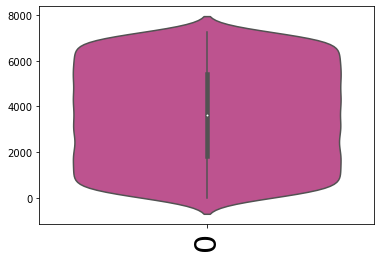

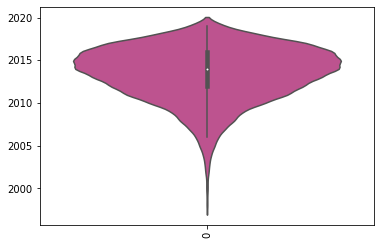

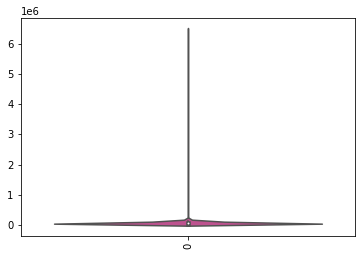

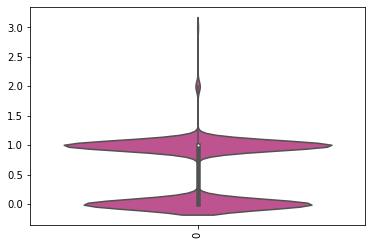

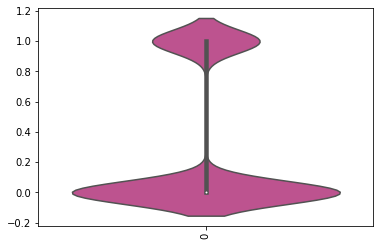

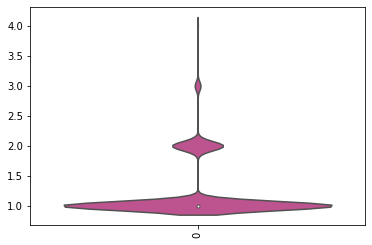

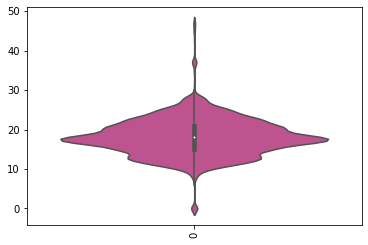

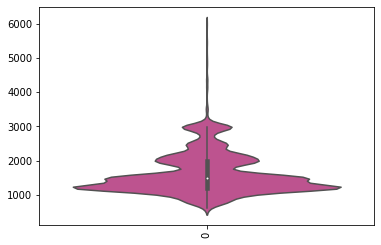

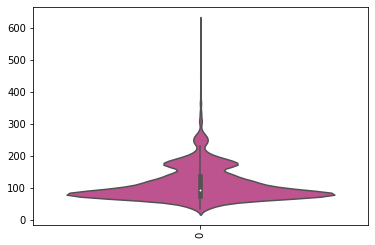

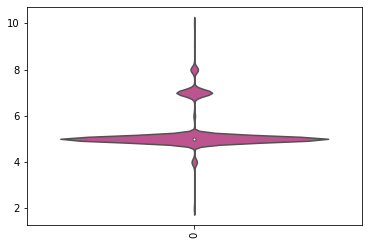

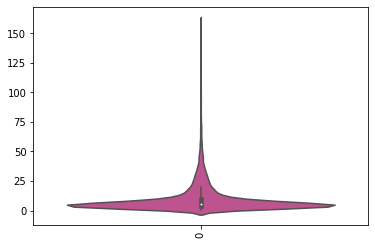

In [84]:
# Violin Plot for numeric variables which shows how the data is spread across that variable
for col in data1.columns:
    if data1[col].dtypes!=object:
        sb.violinplot(data1[col])
        plt.xticks(rotation=90)
        plt.rc('xtick',labelsize=10)
        plt.show()



In [85]:
myreport=sweetviz.analyze(data)
myreport.show_html()

Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Scatter Plots for Continuous Variables.


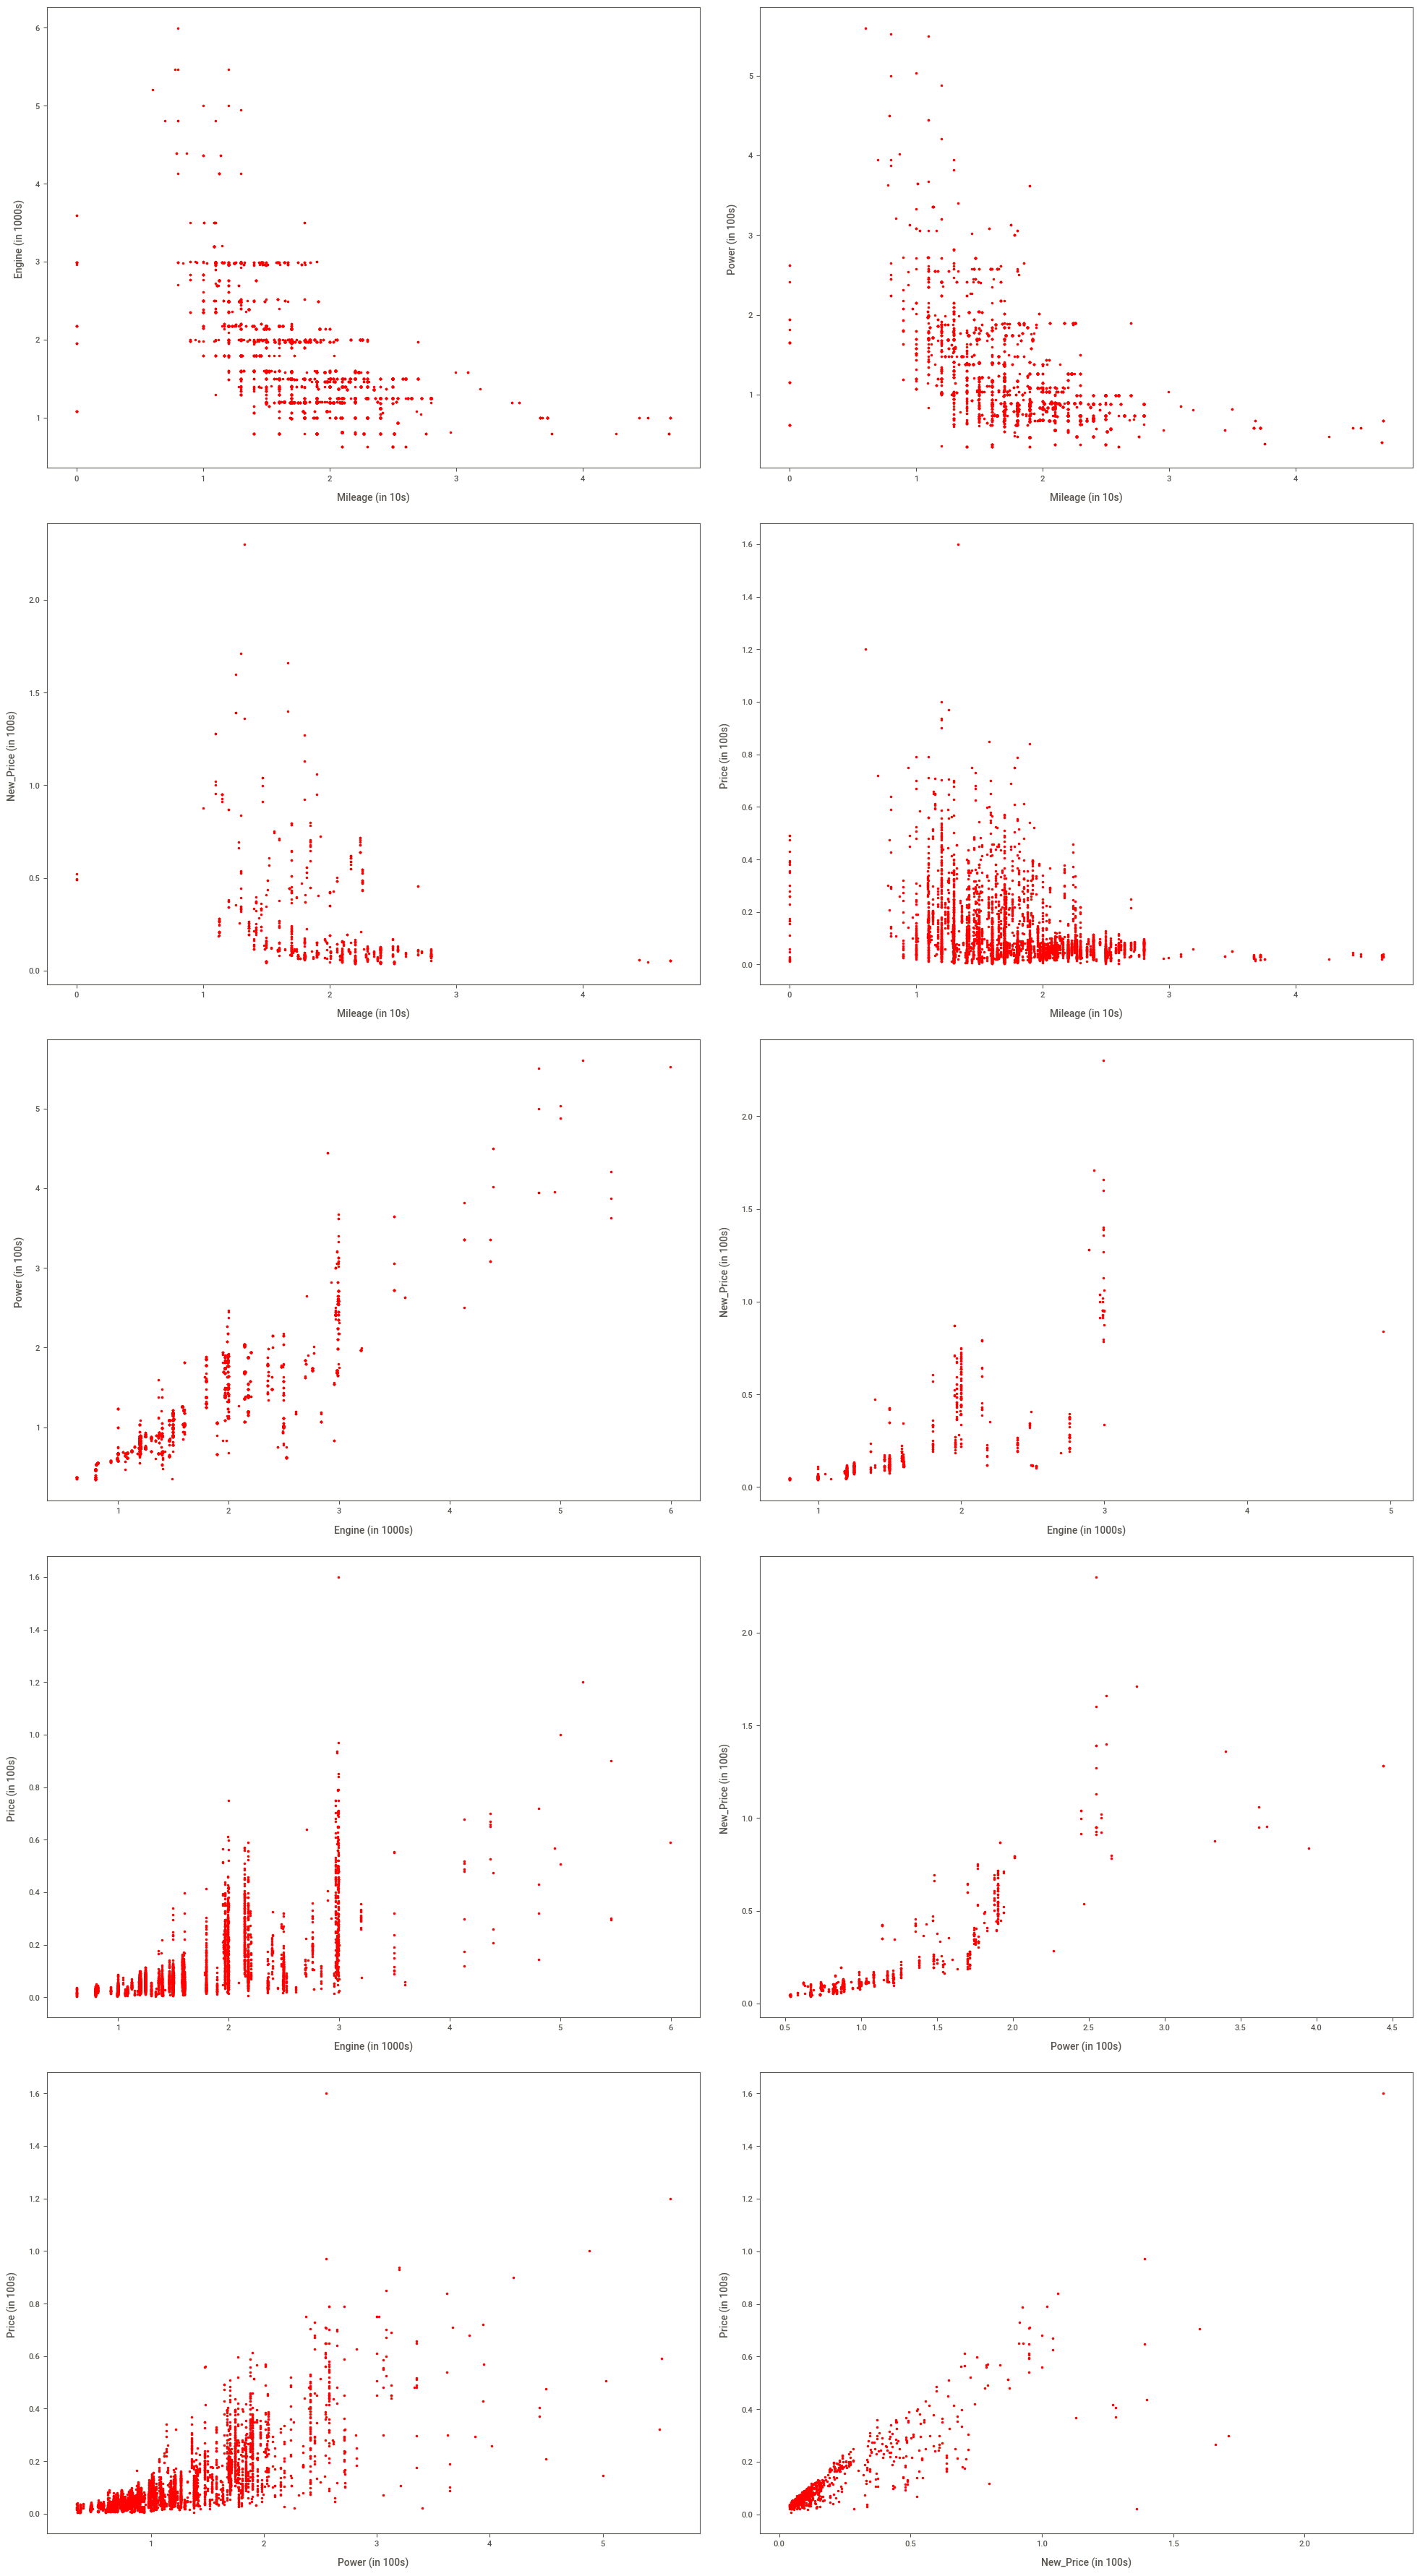

In [86]:
print('Scatter Plots for Continuous Variables.')
fig,ax=plt.subplots(5,2) # creates matplotlib figure with 2 X 5 subplots
# set figure height and width
fig.set_figwidth(20)
fig.set_figheight(36)

def wrap(text,length=20):
    """
    This function wraps the columns name into multiple lines, so that they can be displayed properly in plots.
    Each line has default length of 20 characters. This can be changed.
    """
    return '\n'.join(textwrap.wrap(str(text),length)).strip() # textwrap returns divided lines as array that we join later.
def scatter(datax,datay,xlabel,ylabel,axes):
    """
    This function creates scatter plot between datax and datay in a subplot determined my axes number with x and y labels.
    """
    # since values are large calculating order of magnitude.
    order_mag_x=np.power(10,int(np.log10(datax.max())))
    order_mag_y=np.power(10,int(np.log10(datay.max())))
    # creates scatter plot by dividing x and y values by their respective order of magnitude in red dots.
    ax[axes//2][axes%2].scatter(datax/order_mag_x,datay/order_mag_y,marker='.',color='red')
    # sets x and y label
    ax[axes//2][axes%2].set_xlabel(xlabel+f' (in {order_mag_x}s)',labelpad=10,fontweight='bold',fontsize=10)
    ax[axes//2][axes%2].set_ylabel(ylabel+f' (in {order_mag_y}s) ',labelpad=10,fontweight='bold',fontsize=10)
axis=0 # subplot counter
for i in range(len(continuous)-1):
    for j in range(i+1,len(continuous)):
        # loops over each pair of continuous variables
        # create scatter plots using above funtion and formated x and y labels
        scatter(data_model[continuous[i]],data_model[continuous[j]],wrap(continuous[i],20),wrap(continuous[j],20),axis)
        axis+=1 # incriment counter
plt.tight_layout(pad=2,h_pad=2,w_pad=2) # create a tight layout with 2pt padding between subplots
plt.show() # display plot

In [87]:
f = lambda x: stats.mstats.mode(x, axis=None)[0]
str_vars=["Name", "Location", "Company"]
numeric_df=data_model.copy(deep=True)
for t in str_vars:
    numeric_df=numeric_df.drop(t, axis=1)
numeric_df.apply(f)

S.No.    Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  \
0      0  2014.0            60000.0        1.0           0.0         1.0   

   Mileage  Engine  Power  Seats  New_Price  Price  
0     18.0  1197.0   74.0    5.0       4.78    4.5

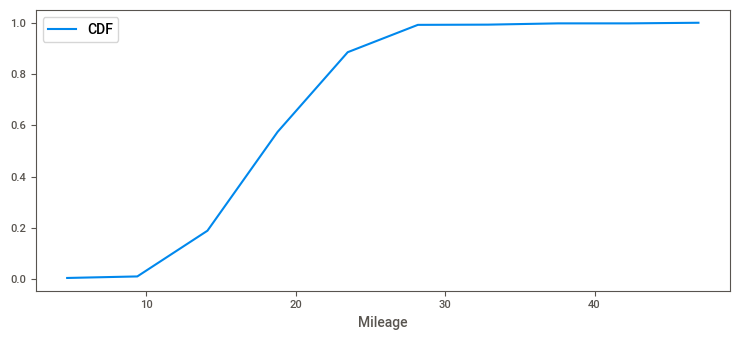

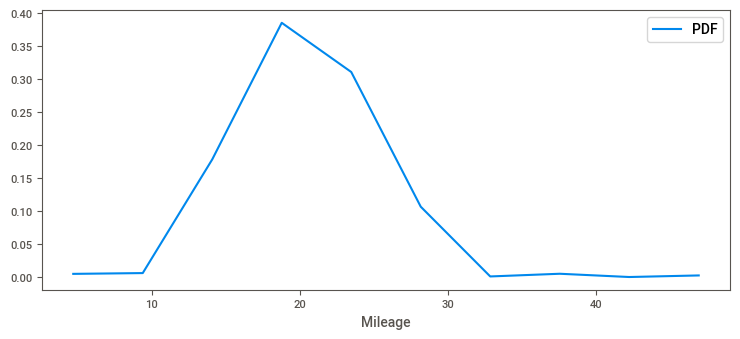

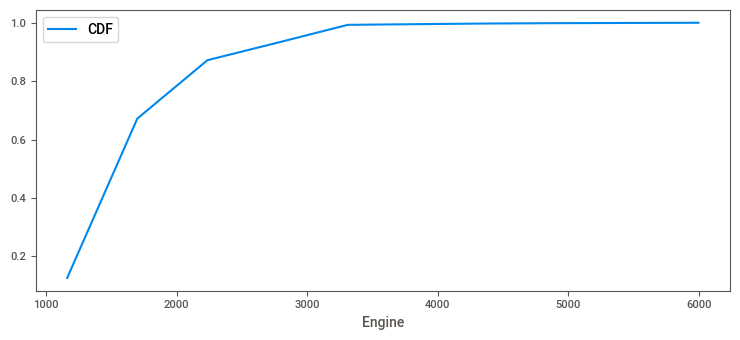

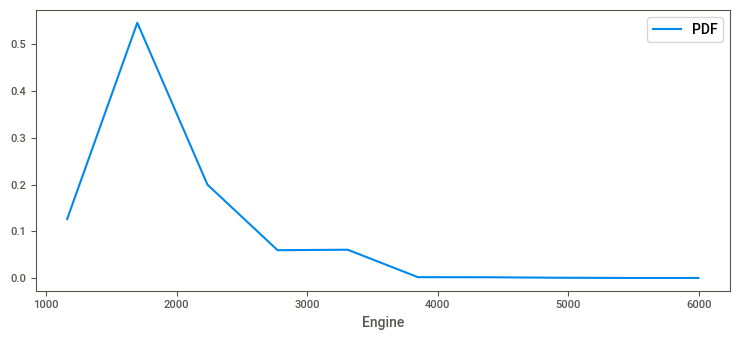

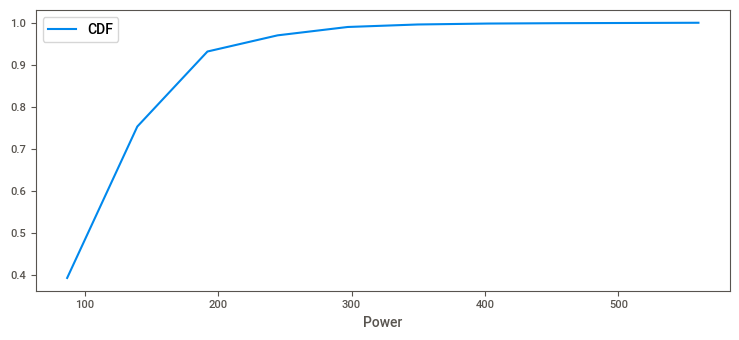

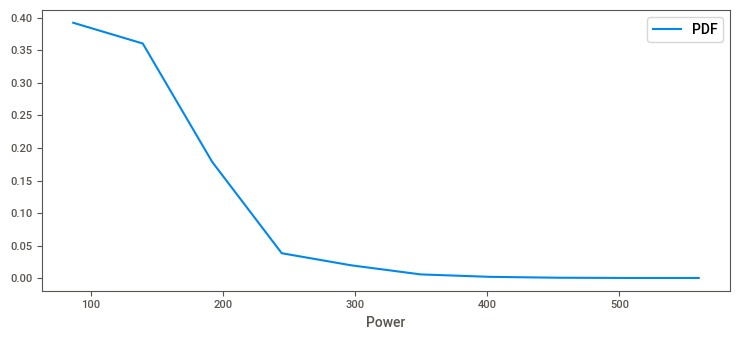

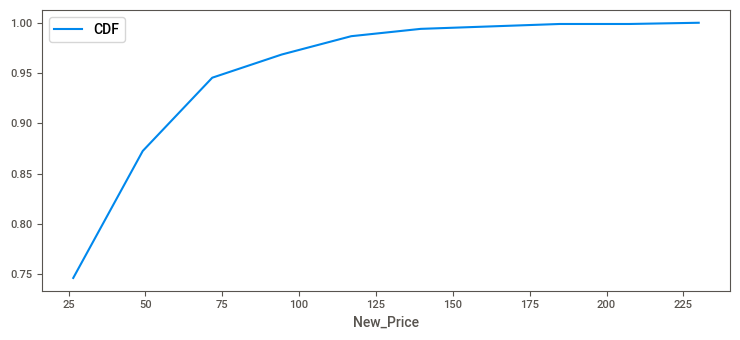

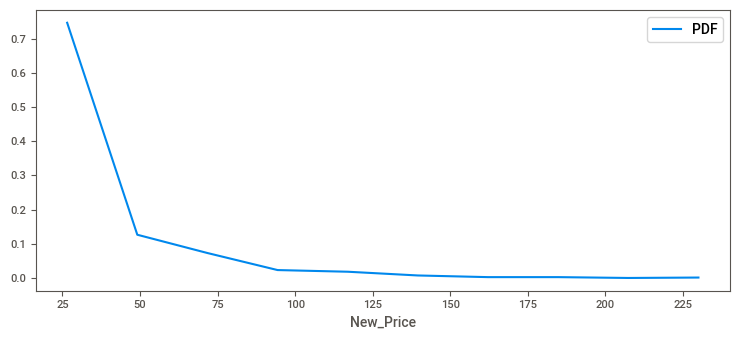

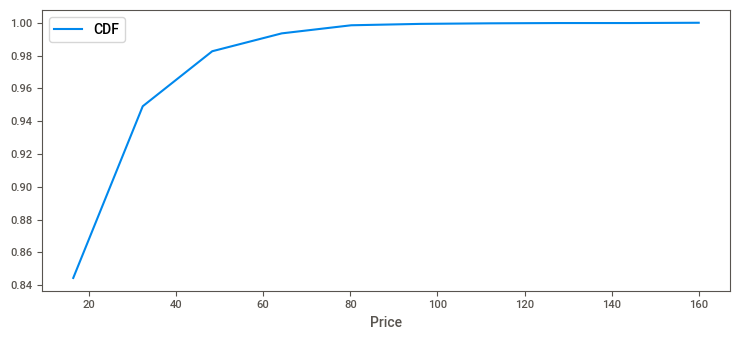

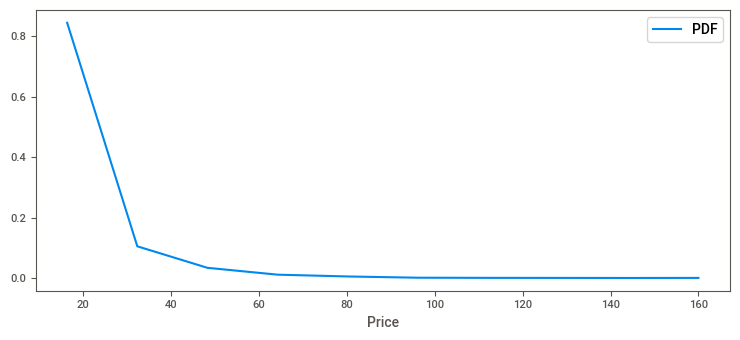

In [88]:
#Plotting PDF and CDF for all continuous columns

#Formatting the size of the graphs
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

N = len(data_model.axes[0])
for col in continuous:
    #Deleting null values
    data = data_model[col].dropna()
    
    #Enumerating the values
    count, bins_count = np.histogram(data, bins=10)
    
    #Finding the PDF
    pdf = count / sum(count)
    
    #Finding the CDF
    cdf = np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf, label="CDF")
    plt.xlabel(col)
    plt.legend()
    plt.show()

    plt.plot(bins_count[1:], pdf, label="PDF")
    plt.xlabel(col)
    plt.legend()
    plt.show()

# Pollution Analysis

Pollution study in different location using the data given
By a simple google search we get to know diesel fuel contains slightly more carbon (2.68kg CO₂/litre) than petrol (2.31kg CO₂/litre) while for cng (2kg CO₂/litre)
Using this we can find amount of pollution in terms of kg of CO₂ released in different locations

In [89]:
# data_pol1 stores the data set required for pollution analysis
data_poll = data_model.sort_values(by = "Location")
data_pol1 =data_poll.drop(['S.No.', 'Name', 'Owner_Type','Engine', 'Power', 'Seats', 'New_Price', 'Price'], axis=1)
data_pol1.reset_index(inplace = True, drop = True)

In [90]:
# adding a column 'Litre_gas' which stores amount of gas used by that specific car in terms
# of litre of gas which it uses. This calculated by (Kilometers driven/Mileage)
data_pol1['Litre_gas'] = round(data_pol1['Kilometers_Driven']/data_pol1['Mileage'],2)
data_pol1
# if Mileage is 0 in a given row then answer will come as infinte so we remove all those columns.
for i in range(data_pol1.shape[0]):
    if(data_pol1.Mileage[i]==0.0):
        data_pol1=data_pol1.drop(i,axis=0)
data_pol1.reset_index(inplace = True, drop = True)

In [91]:
# checking if Mileage=0 is left in any column or not
for i in range(data_pol1.shape[0]):
    if(data_pol1.Mileage[i]==0):
        print(data_pol1.Mileage[i])
        print("check")
        
        
        

In [92]:
# Defining pollution factor as amount of CO₂ produced in terms of kg by a particular car
# Creating a new column 'Pollution_Factor' and storing the above calculated values in it
data_pol1['Pollution_Factor']=0
for i in range(data_pol1.shape[0]):
    if (data_pol1.loc[i,'Fuel_Type']==0):
        data_pol1.loc[i,'Pollution_Factor']=data_pol1.loc[i,'Litre_gas']*2.31
    elif (data_pol1.loc[i,'Fuel_Type']==1):
        data_pol1.loc[i,'Pollution_Factor']=data_pol1.loc[i,'Litre_gas']*2.68
    elif (data_pol1.loc[i,'Fuel_Type']==2):
        data_pol1.loc[i,'Pollution_Factor']=data_pol1.loc[i,'Litre_gas']*2
        
data_pol1

Location  Year  Kilometers_Driven  Fuel_Type  Transmission  Mileage  \
0     Ahmedabad  2008              45000          1             1     16.7   
1     Ahmedabad  2016              45000          1             1     17.3   
2     Ahmedabad  2014              82002          1             1     17.0   
3     Ahmedabad  2014              35000          1             1     18.1   
4     Ahmedabad  2013              82002          1             1     16.5   
...         ...   ...                ...        ...           ...      ...   
5839       Pune  2013              57197          0             0     15.0   
5840       Pune  2015              28700          0             0     21.0   
5841       Pune  2016              55001          0             1     16.9   
5842       Pune  2010              45252          0             0     18.0   
5843       Pune  2012              49700          1             0     21.0   

         Company  Litre_gas  Pollution_Factor  
0           Audi    2694.61         7221.5548  
1           Audi    2601.16         6971.1088  
2            BMW    4823.65        12927.3820  
3            BMW    1933.70         5182.3160  
4           Audi    4969.82        13319.1176  
...          ...        ...               ...  
5839  Volkswagen    3813.13         8808.3303  
5840     Hyundai    1366.67         3157.0077  
5841  Volkswagen    3254.50         7517.8950  
5842     Hyundai    2514.00         5807.3400  
5843     Hyundai    2366.67         6342.6756  

[5844 rows x 9 columns]

Now we are trying to analyse pollution due to cars in different location by the data given.
For this we segregate pollution by cars wrt different locations

In [93]:
# loc stores all the 11 locations
loc = data_pol1['Location'].unique()
loc

array(['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
       'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
      dtype=object)

In [94]:
# initializing the pollution list for different locations
pollution_loc = list([0]*11)
pollution_loc

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [95]:
for i in range(data_pol1.shape[0]):
    for j in range(11):
        if(data_pol1.Location[i]==loc[j]):
            pollution_loc[j]+=data_pol1.loc[i,'Pollution_Factor']
            

In [96]:
# stores pollution factor for different locations
pollution_loc

[1758834.402399999,
 3277596.1085000033,
 6765222.014099998,
 4524780.576599994,
 4786176.0912999995,
 7682874.644199997,
 4077008.9914000016,
 4143228.8647000035,
 3121699.2350000013,
 5427669.048400004,
 6229709.159199999]

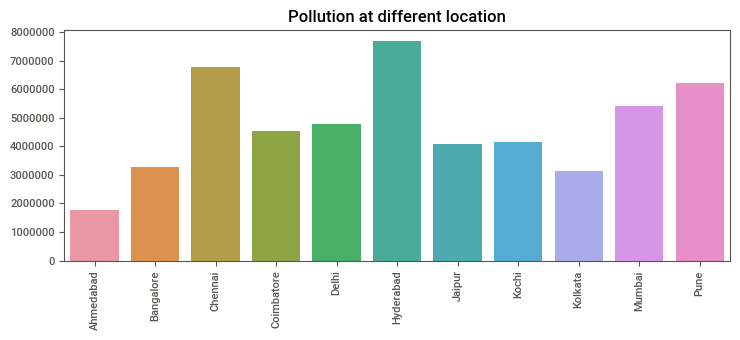

In [97]:
# bar plot for Pollution factor vs location
plt.xticks(rotation=90)
sb.barplot(x=loc,y=pollution_loc)
plt.title('Pollution at different location')
plt.show()

In [98]:
# Now here for Pollution Factor of car we also divide it by number of years it was used to 
# average out pollution at a location for a year
data_pol1['Litre_gas'] = round((data_pol1['Kilometers_Driven']/data_pol1['Mileage'])/(2022-data_pol1['Year']),2)
data_pol1

for i in range(data_pol1.shape[0]):
    if(data_pol1.Mileage[i]==0.0):
        data_pol1=data_pol1.drop(i,axis=0)
data_pol1.reset_index(inplace = True, drop = True)

for i in range(data_pol1.shape[0]):
    if(data_pol1.Mileage[i]==0):
        print(data_pol1.Mileage[i])
        print("Wassup")
    
data_pol1['Pollution_Factor']=0
for i in range(data_pol1.shape[0]):
    if (data_pol1.loc[i,'Fuel_Type']==0):
        data_pol1.loc[i,'Pollution_Factor']=data_pol1.loc[i,'Litre_gas']*2.31
    elif (data_pol1.loc[i,'Fuel_Type']==1):
        data_pol1.loc[i,'Pollution_Factor']=data_pol1.loc[i,'Litre_gas']*2.68
    elif (data_pol1.loc[i,'Fuel_Type']==2):
        data_pol1.loc[i,'Pollution_Factor']=data_pol1.loc[i,'Litre_gas']*2
        
data_pol1

Location  Year  Kilometers_Driven  Fuel_Type  Transmission  Mileage  \
0     Ahmedabad  2008              45000          1             1     16.7   
1     Ahmedabad  2016              45000          1             1     17.3   
2     Ahmedabad  2014              82002          1             1     17.0   
3     Ahmedabad  2014              35000          1             1     18.1   
4     Ahmedabad  2013              82002          1             1     16.5   
...         ...   ...                ...        ...           ...      ...   
5839       Pune  2013              57197          0             0     15.0   
5840       Pune  2015              28700          0             0     21.0   
5841       Pune  2016              55001          0             1     16.9   
5842       Pune  2010              45252          0             0     18.0   
5843       Pune  2012              49700          1             0     21.0   

         Company  Litre_gas  Pollution_Factor  
0           Audi     192.47          515.8196  
1           Audi     433.53         1161.8604  
2            BMW     602.96         1615.9328  
3            BMW     241.71          647.7828  
4           Audi     552.20         1479.8960  
...          ...        ...               ...  
5839  Volkswagen     423.68          978.7008  
5840     Hyundai     195.24          451.0044  
5841  Volkswagen     542.42         1252.9902  
5842     Hyundai     209.50          483.9450  
5843     Hyundai     236.67          634.2756  

[5844 rows x 9 columns]

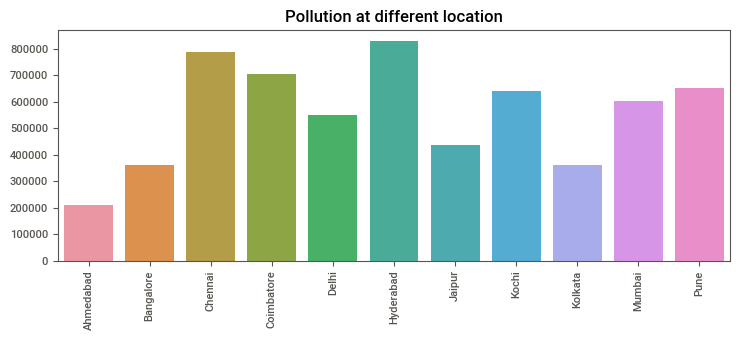

In [99]:
pollution_loc = list([0]*11)

for i in range(data_pol1.shape[0]):
    for j in range(11):
        if(data_pol1.Location[i]==loc[j]):
            pollution_loc[j]+=data_pol1.loc[i,'Pollution_Factor']
            
plt.xticks(rotation=90)
sb.barplot(x=loc,y=pollution_loc)
plt.title('Pollution at different location')
plt.show()

In [100]:
loc

array(['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
       'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
      dtype=object)

In [101]:
from collections import OrderedDict
most_cat  = OrderedDict(sorted(most_cat.items()))
most_cat


OrderedDict([('Ahmedabad', 271),
             ('Bangalore', 422),
             ('Chennai', 569),
             ('Coimbatore', 762),
             ('Delhi', 650),
             ('Hyderabad', 850),
             ('Jaipur', 484),
             ('Kochi', 764),
             ('Kolkata', 633),
             ('Mumbai', 934),
             ('Pune', 734)])

In [102]:
# Number of cars in different locations
No_cars_Loc = list(most_cat.values())
No_cars_Loc

[271, 422, 569, 762, 650, 850, 484, 764, 633, 934, 734]

In [103]:
# Here we are trying to find average pollution caused by the at different locations
for i in range(11):
    pollution_loc[i] = pollution_loc[i]/No_cars_Loc[i]

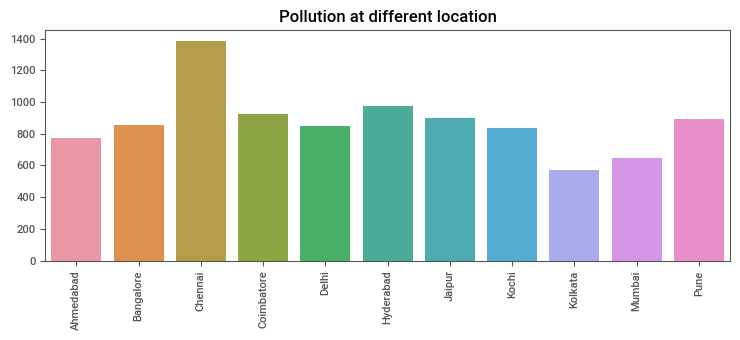

In [104]:
plt.xticks(rotation=90)
sb.barplot(x=loc,y=pollution_loc)
plt.title('Pollution at different location')
plt.show()

## Machine Learning

In [105]:
#taking final1 model for training
final = data_model.fillna(0)
final1 = final.drop(['Name','Location','Company'], axis=1)

In [106]:
X = final1.drop('Price',axis = 1)
y = final1.Price

In [107]:
#splitting data into training, validation and testing sets
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

#making models of different regression techniques
models = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]
#training models
for model in models:
    
    model.fit(X_train, y_train)
    print(model)
    y_pred = model.predict(X_valid)
    #print(model.predict(X_test))
    result = model.score(X_valid, y_valid)
    print("Accuracy: %.2f%%" % (result*100.0))
    print("RMSE: "+str(math.sqrt(((y_valid - y_pred)**2).mean())))
   


SVR()
Accuracy: -11.09%
RMSE: 12.067450448048257
SGDRegressor()
Accuracy: -226651761697735618187037536356925440.00%
RMSE: 5.4507901996667904e+17
BayesianRidge()
Accuracy: 74.12%
RMSE: 5.82445920772773
LassoLars()
Accuracy: -0.34%
RMSE: 11.468677004616115
ARDRegression()
Accuracy: 74.23%
RMSE: 5.811701083747457
PassiveAggressiveRegressor()
Accuracy: 2.45%
RMSE: 11.30822867559387
TheilSenRegressor()
Accuracy: -713.77%
RMSE: 32.66113866266361
LinearRegression()
Accuracy: 74.12%
RMSE: 5.824002166038685


In [108]:
#doing model testing and calculating RMSE for linear regression
reg = LinearRegression().fit(X_train,(y_train))
print("R-Squered Train",round((reg.score(X_train,  (y_train))*100),2),'%')
print("R-Squered Test",round((reg.score(X_test,  (y_test))*100),2),'%')
y_pred = reg.predict(X_test)
print(f"RMSE: {mean_squared_error(y_pred,(y_test))}")

R-Squered Train 70.81 %
R-Squered Test 76.78 %
RMSE: 32.68633836624279


In [109]:
df = datam_withoutprice.copy()

In [110]:
df.head()

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      3                 Maruti Ertiga VDI     Chennai  2012   
3      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
4      5   Hyundai EON LPG Era Plus Option   Hyderabad  2012   

   Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  Engine  \
0              72000          2             0           1    37.24   998.0   
1              41000          1             0           1    19.60  1582.0   
2              87000          1             0           1    20.70  1248.0   
3              40670          1             1           2    15.00  1968.0   
4              75000          3             0           1    29.54   814.0   

    Power  Seats  Price  Company  
0   58.16    5.0   1.75   Maruti  
1  126.20    5.0  12.50  Hyundai  
2   88.76    7.0   6.00   Maruti  
3  140.80    5.0  17.74     Audi  
4   55.20    5.0   2.35  Hyundai

In [111]:
df2 = df.copy()
df2 = df2.drop(columns=['S.No.'])
first_column = df2.pop('Price')
df2.insert(0, 'Price', first_column)
#Price is the variable we want to predict which is put into the first column
df3 = df2.drop(['Name','Location','Company'], axis=1)
display(df3)


Price  Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  \
0      1.75  2010              72000          2             0           1   
1     12.50  2015              41000          1             0           1   
2      6.00  2012              87000          1             0           1   
3     17.74  2013              40670          1             1           2   
4      2.35  2012              75000          3             0           1   
...     ...   ...                ...        ...           ...         ...   
5044   4.83  2015              70602          1             0           1   
5045   4.00  2015             100000          1             0           1   
5046   2.90  2012              55000          1             0           2   
5047   2.65  2013              46000          0             0           1   
5048   2.50  2011              47000          1             0           1   

      Mileage  Engine   Power  Seats  
0       37.24   998.0   58.16    5.0  
1       19.60  1582.0  126.20    5.0  
2       20.70  1248.0   88.76    7.0  
3       15.00  1968.0  140.80    5.0  
4       29.54   814.0   55.20    5.0  
...       ...     ...     ...    ...  
5044    25.00  1498.0   98.60    5.0  
5045    24.00  1120.0   71.00    5.0  
5046    14.00  2498.0  112.00    8.0  
5047    18.00   998.0   67.10    5.0  
5048    25.40   936.0   57.60    5.0  

[5049 rows x 10 columns]

In [112]:
#calculating Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
xtrain,xtest,ytrain,ytest = train_test_split(df3.iloc[:,1:],df3.iloc[:,0],test_size=0.15)
vif=pd.DataFrame()
vif['vif_factor']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]   
vif['features']=xtrain.columns
print(vif)

   vif_factor           features
0  184.871008               Year
1    1.368987  Kilometers_Driven
2    4.318614          Fuel_Type
3    2.596406       Transmission
4    8.145003         Owner_Type
5   47.061897            Mileage
6   74.487073             Engine
7   37.351499              Power
8   78.922614              Seats


In [113]:
#dropping column with vif >10
df3.drop(['Year','Mileage','Owner_Type','Engine','Power','Seats'], axis=1, inplace =True)


In [114]:
df3

Price  Kilometers_Driven  Fuel_Type  Transmission
0      1.75              72000          2             0
1     12.50              41000          1             0
2      6.00              87000          1             0
3     17.74              40670          1             1
4      2.35              75000          3             0
...     ...                ...        ...           ...
5044   4.83              70602          1             0
5045   4.00             100000          1             0
5046   2.90              55000          1             0
5047   2.65              46000          0             0
5048   2.50              47000          1             0

[5049 rows x 4 columns]

In [115]:
#initializing score card of different models
score_card = pd.DataFrame()

In [116]:
#performing decision tree regression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
#splitting training and testing datasets according to iloc indices
xtrain,xtest,ytrain,ytest = train_test_split(df3.iloc[:,1:],df3.iloc[:,0],test_size=0.2)
dtr = DecisionTreeRegressor().fit(xtrain,ytrain)
#printing scores of training and testing datasets
print(dtr.score(xtrain,ytrain))
print(dtr.score(xtest,ytest))

0.8630649869847238
0.23600477537157005


In [117]:
y_pred = dtr.predict(xtest)
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
rmse=np.sqrt(mean_squared_error(ytest,y_pred))
#r2_score
r2=r2_score(ytest,y_pred)
Decision_tree_notOneHot_NotNormalized = pd.Series({
                     'Model_Name': "Dtree_notOneHot_NotNormalized_noValidation",
                     'RMSE':rmse,
                     'R-Squared':r2 ,
                   })
#appending into scorecard 
score_card = score_card.append(Decision_tree_notOneHot_NotNormalized, ignore_index=True)
#displays the scorecard
score_card

Model_Name      RMSE  R-Squared
0  Dtree_notOneHot_NotNormalized_noValidation  8.751237   0.236005

In [118]:
import pandas as pd
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
#not normalizing discrete variables
column_names_to_not_normalize = ['Fuel_Type','Transmission','Owner_Type']#'New_Price'
#extracting continuous variables for normalizing
column_names_to_normalize = [x for x in list(df3) if x not in column_names_to_not_normalize ]
x = df3[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
#normalizing datasets
df3_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df3.index)
df3[column_names_to_normalize] = df3_temp
df3.head()

Price  Kilometers_Driven  Fuel_Type  Transmission
0  0.010957           0.011051          2             0
1  0.100870           0.006282          1             0
2  0.046504           0.013359          1             0
3  0.144697           0.006231          1             1
4  0.015975           0.011512          3             0

In [119]:
#doing one bit hot encoding
df4 = df3.copy()
#assigning prefixes
df5 = pd.get_dummies(df4, prefix=['Fuel_Type','Transmission'], columns=['Fuel_Type','Transmission'])
df5.head()

Price  Kilometers_Driven  Fuel_Type_0  Fuel_Type_1  Fuel_Type_2  \
0  0.010957           0.011051            0            0            1   
1  0.100870           0.006282            0            1            0   
2  0.046504           0.013359            0            1            0   
3  0.144697           0.006231            0            1            0   
4  0.015975           0.011512            0            0            0   

   Fuel_Type_3  Transmission_0  Transmission_1  
0            0               1               0  
1            0               1               0  
2            0               1               0  
3            0               0               1  
4            1               1               0

In [120]:
df5.shape

(5049, 8)

In [121]:
#performing decision tree regression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
#splitting training and testing datasets according to iloc indices
xtrain,xtest,ytrain,ytest = train_test_split(df5.iloc[:,1:],df5.iloc[:,0],test_size=0.2)
dtr = DecisionTreeRegressor().fit(xtrain,ytrain)
#printing scores of training and testing datasets
print(dtr.score(xtrain,ytrain))
print(dtr.score(xtest,ytest))

0.8731980051798433
0.24091601653231065


In [122]:
y_pred = dtr.predict(xtest)
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
rmse=np.sqrt(mean_squared_error(ytest,y_pred))
#r2_score
r2=r2_score(ytest,y_pred)
Dtree_OneHot_Normalized = pd.Series({
                     'Model_Name': "Dtree_OneHot_Normalized_noValidation",
                     'RMSE':rmse,
                     'R-Squared':r2 ,
                   })
#appending into scorecard
score_card = score_card.append(Dtree_OneHot_Normalized, ignore_index=True)
#displays the scorecard
score_card

Model_Name      RMSE  R-Squared
0  Dtree_notOneHot_NotNormalized_noValidation  8.751237   0.236005
1        Dtree_OneHot_Normalized_noValidation  0.076549   0.240916

In [123]:
#doing Principal component analysis to reduce data dimensions
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
#initializing PCA
pca = PCA()
#making training and testing datasets
xtrain2 = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)
#calculating EVR
explained_variance = pca.explained_variance_ratio_
evr=pd.DataFrame()
evr['VIF']=explained_variance*100  
evr['features']=xtrain.columns
evr.sort_values('VIF',ascending=False)
evr.round(2)

VIF           features
0  57.30  Kilometers_Driven
1  40.77        Fuel_Type_0
2   1.69        Fuel_Type_1
3   0.21        Fuel_Type_2
4   0.03        Fuel_Type_3
5   0.00     Transmission_0
6   0.00     Transmission_1

In [124]:
#doiing training of PCA based D-tree regression
from sklearn.decomposition import PCA
xtrain,xtest,ytrain,ytest = train_test_split(df5.iloc[:,1:],df5.iloc[:,0],test_size=0.2)
pca = PCA(n_components=3)
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)
from sklearn.ensemble import RandomForestClassifier

dtr = DecisionTreeRegressor().fit(xtrain,ytrain)
print(dtr.score(xtrain,ytrain))
print(dtr.score(xtest,ytest))

0.6193387140766289
0.5352199498008526


In [125]:
y_pred = dtr.predict(xtest)
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
rmse=np.sqrt(mean_squared_error(ytest,y_pred))
#r2_score
r2=r2_score(ytest,y_pred)
Dtree_WithPCA = pd.Series({
                     'Model_Name': "Dtree_WithPCA",
                     'RMSE':rmse,
                     'R-Squared':r2 ,
                   })

score_card = score_card.append(Dtree_WithPCA, ignore_index=True)

score_card

Model_Name      RMSE  R-Squared
0  Dtree_notOneHot_NotNormalized_noValidation  8.751237   0.236005
1        Dtree_OneHot_Normalized_noValidation  0.076549   0.240916
2                               Dtree_WithPCA  0.051913   0.535220

In [126]:
 X_train, X_test, y_train, y_test  = train_test_split(df4.iloc[:,1:],df4.iloc[:,0],test_size=0.15)

 X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.176, random_state=1) # 0.176*0.85=0.15

In [127]:
#going ahead with gridsearch D-tree regression 
from sklearn.model_selection import GridSearchCV
param_grid={'criterion':['mse'],
           'max_depth':range(17,18),
           'min_samples_leaf':range(10,11),
           'min_samples_split':range(2,10)}
gr = GridSearchCV(DecisionTreeRegressor(),param_grid,cv=5,n_jobs=-1)
gr.fit(X_val, y_val)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': range(17, 18),
                         'min_samples_leaf': range(10, 11),
                         'min_samples_split': range(2, 10)})

In [128]:
#printing best parameters
gr.best_params_

{'criterion': 'mse',
 'max_depth': 17,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [129]:
#initializing dtr with best parameters
dtr = DecisionTreeRegressor(criterion='mse',max_depth=17,min_samples_leaf=10,min_samples_split=4).fit(X_train,y_train)
print(dtr.score(X_train,y_train))
print(dtr.score(X_val, y_val))

0.6059141144432468
0.5534022412289996


In [130]:
y_pred = dtr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
#r2_score
r2=r2_score(y_test,y_pred)
DTree_withHyperParTuning = pd.Series({
                     'Model_Name': "DTree_withHyperParTuning",
                     'RMSE':rmse,
                     'R-Squared':r2 ,
                   })

score_card = score_card.append(DTree_withHyperParTuning, ignore_index=True)

score_card

Model_Name      RMSE  R-Squared
0  Dtree_notOneHot_NotNormalized_noValidation  8.751237   0.236005
1        Dtree_OneHot_Normalized_noValidation  0.076549   0.240916
2                               Dtree_WithPCA  0.051913   0.535220
3                    DTree_withHyperParTuning  0.059891   0.441397

In [131]:
#performing random forest regression
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=9).fit(X_train,y_train)
print(rfr.score(X_train,y_train))
print(rfr.score(X_val, y_val))

0.8080481569200939
0.40747767668176427


In [132]:
y_pred = rfr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
#r2_score
r2=r2_score(y_test,y_pred)
RFR_withValidation = pd.Series({
                     'Model_Name': "RFR_withValidation",
                     'RMSE':rmse,
                     'R-Squared':r2 ,
                   })

score_card = score_card.append(RFR_withValidation, ignore_index=True)

score_card

Model_Name      RMSE  R-Squared
0  Dtree_notOneHot_NotNormalized_noValidation  8.751237   0.236005
1        Dtree_OneHot_Normalized_noValidation  0.076549   0.240916
2                               Dtree_WithPCA  0.051913   0.535220
3                    DTree_withHyperParTuning  0.059891   0.441397
4                          RFR_withValidation  0.061743   0.406323

In [133]:
#perorming RFR hyperparameter tuning in 300 loops
#time taking as 300 iterations
from sklearn.model_selection import cross_val_score
score=[]
for n in range(1,300):
    rfr = RandomForestRegressor(n_estimators=n,n_jobs=-1)
    rfrscore = cross_val_score(rfr,X_train,y_train,cv=5).mean()
    score.append(rfrscore)

In [134]:
#printing best maximum score among all 300 scores
print(max(score),score.index(max(score)))

0.3868438945211415 77


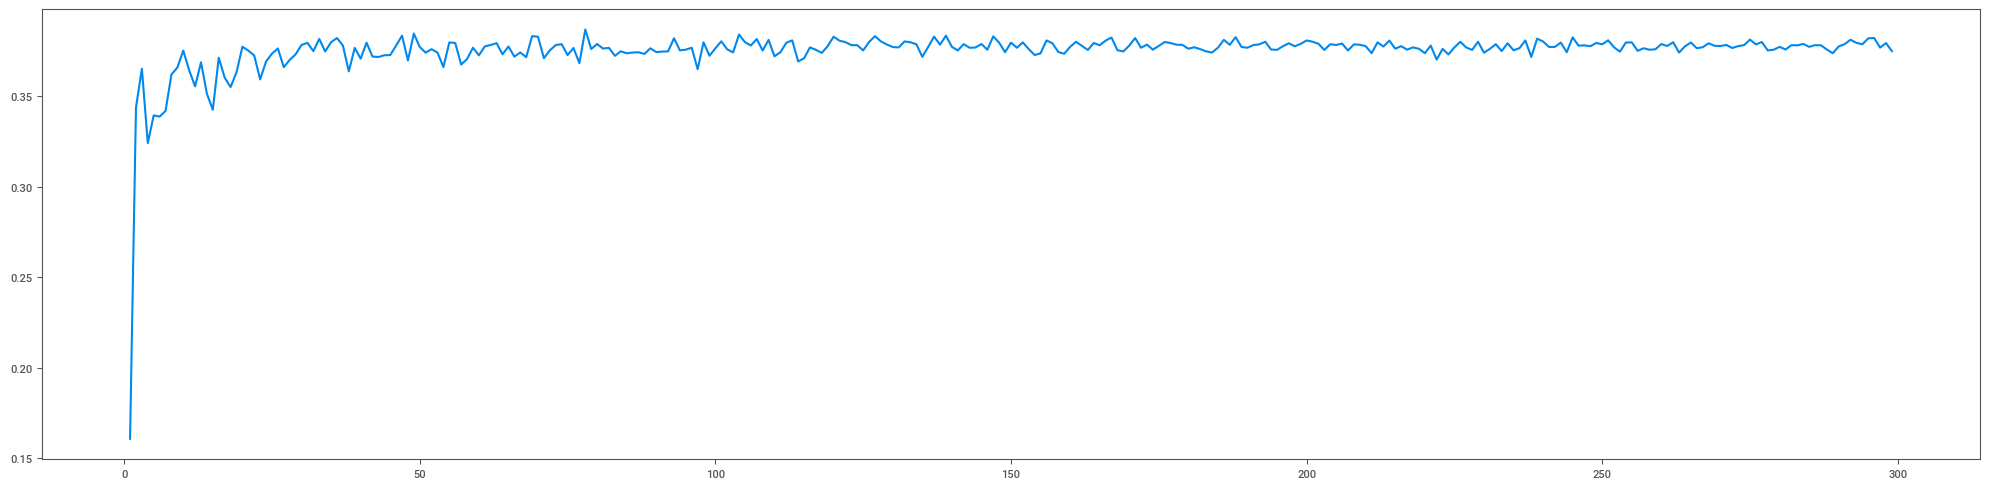

In [135]:
#plotting graph
plt.figure(figsize=(20,5))
sb.lineplot(x=range(1,300),y=score)
plt.show()

In [136]:
#evaluating score and RMSE of rfr
rfr = RandomForestRegressor(n_estimators=74,n_jobs=-1).fit(X_train,y_train)
print(rfr.score(X_train,y_train))
print(rfr.score(X_val, y_val))
y_pred = rfr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
#r2_score
r2=r2_score(y_test,y_pred)
RFR_with_HyperparaTuning = pd.Series({
                     'Model_Name': "RFR_with_HyperparaTuning",
                     'RMSE':rmse,
                     'R-Squared':r2 ,
                   })

0.8209056119389478
0.43608633662825136


In [137]:
score_card = score_card.append(RFR_with_HyperparaTuning, ignore_index=True)
score_card

Model_Name      RMSE  R-Squared
0  Dtree_notOneHot_NotNormalized_noValidation  8.751237   0.236005
1        Dtree_OneHot_Normalized_noValidation  0.076549   0.240916
2                               Dtree_WithPCA  0.051913   0.535220
3                    DTree_withHyperParTuning  0.059891   0.441397
4                          RFR_withValidation  0.061743   0.406323
5                    RFR_with_HyperparaTuning  0.061826   0.404721

In [138]:
df6 = df2.copy()
df6.drop(['Name','Location','Company'], axis=1, inplace = True)
df6

Price  Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  \
0      1.75  2010              72000          2             0           1   
1     12.50  2015              41000          1             0           1   
2      6.00  2012              87000          1             0           1   
3     17.74  2013              40670          1             1           2   
4      2.35  2012              75000          3             0           1   
...     ...   ...                ...        ...           ...         ...   
5044   4.83  2015              70602          1             0           1   
5045   4.00  2015             100000          1             0           1   
5046   2.90  2012              55000          1             0           2   
5047   2.65  2013              46000          0             0           1   
5048   2.50  2011              47000          1             0           1   

      Mileage  Engine   Power  Seats  
0       37.24   998.0   58.16    5.0  
1       19.60  1582.0  126.20    5.0  
2       20.70  1248.0   88.76    7.0  
3       15.00  1968.0  140.80    5.0  
4       29.54   814.0   55.20    5.0  
...       ...     ...     ...    ...  
5044    25.00  1498.0   98.60    5.0  
5045    24.00  1120.0   71.00    5.0  
5046    14.00  2498.0  112.00    8.0  
5047    18.00   998.0   67.10    5.0  
5048    25.40   936.0   57.60    5.0  

[5049 rows x 10 columns]

In [139]:
df6.drop(['Year','Fuel_Type','Transmission','Owner_Type','Seats'], axis=1, inplace = True)
df6

Price  Kilometers_Driven  Mileage  Engine   Power
0      1.75              72000    37.24   998.0   58.16
1     12.50              41000    19.60  1582.0  126.20
2      6.00              87000    20.70  1248.0   88.76
3     17.74              40670    15.00  1968.0  140.80
4      2.35              75000    29.54   814.0   55.20
...     ...                ...      ...     ...     ...
5044   4.83              70602    25.00  1498.0   98.60
5045   4.00             100000    24.00  1120.0   71.00
5046   2.90              55000    14.00  2498.0  112.00
5047   2.65              46000    18.00   998.0   67.10
5048   2.50              47000    25.40   936.0   57.60

[5049 rows x 5 columns]

In [140]:
df7 = datam_withoutprice.copy()
df7

S.No.                              Name    Location  Year  \
0         0            Maruti Wagon R LXI CNG      Mumbai  2010   
1         1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2         3                 Maruti Ertiga VDI     Chennai  2012   
3         4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
4         5   Hyundai EON LPG Era Plus Option   Hyderabad  2012   
...     ...                               ...         ...   ...   
5044   6013             Honda Amaze VX i-DTEC  Coimbatore  2015   
5045   6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
5046   6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
5047   6017                Maruti Wagon R VXI     Kolkata  2013   
5048   6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  Engine  \
0                 72000          2             0           1    37.24   998.0   
1                 41000          1             0           1    19.60  1582.0   
2                 87000          1             0           1    20.70  1248.0   
3                 40670          1             1           2    15.00  1968.0   
4                 75000          3             0           1    29.54   814.0   
...                 ...        ...           ...         ...      ...     ...   
5044              70602          1             0           1    25.00  1498.0   
5045             100000          1             0           1    24.00  1120.0   
5046              55000          1             0           2    14.00  2498.0   
5047              46000          0             0           1    18.00   998.0   
5048              47000          1             0           1    25.40   936.0   

       Power  Seats  Price    Company  
0      58.16    5.0   1.75     Maruti  
1     126.20    5.0  12.50    Hyundai  
2      88.76    7.0   6.00     Maruti  
3     140.80    5.0  17.74       Audi  
4      55.20    5.0   2.35    Hyundai  
...      ...    ...    ...        ...  
5044   98.60    5.0   4.83      Honda  
5045   71.00    5.0   4.00    Hyundai  
5046  112.00    8.0   2.90   Mahindra  
5047   67.10    5.0   2.65     Maruti  
5048   57.60    5.0   2.50  Chevrolet  

[5049 rows x 14 columns]

In [141]:
df7.drop(['Year','Owner_Type','Seats','Name','Location','Company','Mileage','Engine','Power'], axis=1, inplace = True)
df7

S.No.  Kilometers_Driven  Fuel_Type  Transmission  Price
0         0              72000          2             0   1.75
1         1              41000          1             0  12.50
2         3              87000          1             0   6.00
3         4              40670          1             1  17.74
4         5              75000          3             0   2.35
...     ...                ...        ...           ...    ...
5044   6013              70602          1             0   4.83
5045   6015             100000          1             0   4.00
5046   6016              55000          1             0   2.90
5047   6017              46000          0             0   2.65
5048   6018              47000          1             0   2.50

[5049 rows x 5 columns]

In [143]:

y_col='Price' # defining target variable

test_size = int(len(df3) * 0.15) # testsize is 15%
train = df3.iloc[:-test_size,:].copy()
test = df3.iloc[-test_size:,:].copy()


X_train = train.drop(y_col,axis=1).copy()
y_train = train[[y_col]].copy() # the double brakets here are to keep the y in dataframe format, otherwise it will be pandas Series

Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train)
scaled_y_train = Yscaler.transform(y_train)
scaled_y_train = scaled_y_train.reshape(-1) # removing the second dimention

scaled_y_train = np.insert(scaled_y_train, 0, 0)
scaled_y_train = np.delete(scaled_y_train, -1)

n_input = 25 #how many samples/rows/timesteps to look in the past in order to forecast the next sample
n_features= X_train.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 32 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=n_input, batch_size=b_size)

model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


model.fit(generator,epochs=30)


X_test = test.drop(y_col,axis=1).copy()
scaled_X_test = Xscaler.transform(X_test)
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=n_input, batch_size=b_size)

y_pred_scaled = model.predict(test_generator)
y_pred = Yscaler.inverse_transform(y_pred_scaled)
results = pd.DataFrame({'y_true':test[y_col].values[n_input:],'y_pred':y_pred.ravel()})

Epoch 1/30
134/134 [==============================] - 10s 55ms/step - loss: 0.0101
Epoch 2/30
134/134 [==============================] - 13s 98ms/step - loss: 0.0072
Epoch 3/30
134/134 [==============================] - 13s 100ms/step - loss: 0.0069
Epoch 4/30
134/134 [==============================] - 13s 98ms/step - loss: 0.0067
Epoch 5/30
134/134 [==============================] - 9s 63ms/step - loss: 0.0066
Epoch 6/30
134/134 [==============================] - 9s 64ms/step - loss: 0.0065
Epoch 7/30
134/134 [==============================] - 9s 64ms/step - loss: 0.0064
Epoch 8/30
134/134 [==============================] - 9s 65ms/step - loss: 0.0064
Epoch 9/30
134/134 [==============================] - 8s 63ms/step - loss: 0.0064
Epoch 10/30
134/134 [==============================] - 9s 71ms/step - loss: 0.0063
Epoch 11/30
134/134 [==============================] - 10s 76ms/step - loss: 0.0063
Epoch 12/30
134/134 [==============================] - 12s 89ms/step - loss: 0.0063
Epoch 

In [144]:
#printing results
print(results)

       y_true    y_pred
0    0.035045  0.091350
1    0.005437  0.035815
2    0.028103  0.037479
3    0.128053  0.051171
4    0.019321  0.200997
..        ...       ...
727  0.036718  0.072399
728  0.029776  0.062996
729  0.020575  0.058666
730  0.018484  0.058622
731  0.017230  0.041214

[732 rows x 2 columns]


<AxesSubplot:>

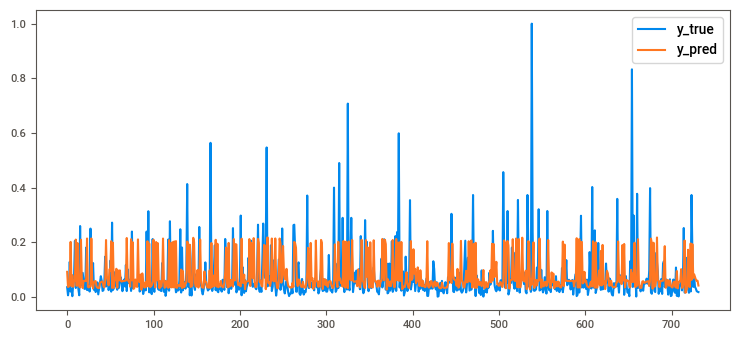

In [145]:
#plotting results
results.plot()